In [1]:
import pandas as pd
import numpy as np
import cx_Oracle
import os
import json
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action="ignore")
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import bs4
import requests
import time
import math
import random
from shapely.geometry import Point, Polygon
import time as timesys
from pyproj import Geod
from haversine import haversine
pd.set_option('display.max_columns', None)

23, 25, 26, 27항차 비교

In [2]:
cf_port_mis_df = pd.read_csv("voy_path/COSCO_FOS_portmis.csv")
cf_port_mis_df

,voyage_name,port_in_time,port_out_time,next_port,previous_port
0,VRKR6_2022_12,2022-07-22 06:48:00,2022-07-23 17:56:00,TIANJIN XINGANG PT,DALIAN
1,VRKR6_2022_13,2022-08-01 01:03:00,2022-08-02 17:56:00,TIANJIN XINGANG PT,DALIAN
2,VRKR6_2022_14,2022-08-10 01:54:00,2022-08-11 14:54:00,TIANJIN XINGANG PT,DALIAN
3,VRKR6_2022_15,2022-08-17 19:55:00,2022-08-18 23:55:00,TIANJIN XINGANG PT,DALIAN
4,VRKR6_2022_16,2022-08-24 18:42:00,2022-08-26 03:00:00,TIANJIN XINGANG PT,DALIAN
5,VRKR6_2022_17,2022-08-30 19:35:00,2022-09-04 11:48:00,TIANJIN XINGANG PT,TIANJIN XINGANG PT
6,VRKR6_2022_18,2022-09-11 08:23:00,2022-09-15 03:52:00,TIANJIN XINGANG PT,TIANJIN XINGANG PT
7,VRKR6_2022_19,2022-09-24 14:15:00,2022-09-27 16:40:00,TIANJIN XINGANG PT,TIANJIN XINGANG PT
8,VRKR6_2022_20,2022-10-04 21:00:00,2022-10-06 19:50:00,TIANJIN XINGANG PT,TIANJIN XINGANG PT
9,VRKR6_2022_21,2022-10-12 00:50:00,2022-10-13 20:42:00,TIANJIN XINGANG PT,TIANJIN XINGANG PT


In [3]:
tos_plan_berth = pd.read_csv("tos_plan_berth.csv")


In [4]:
time_before = cf_port_mis_df.loc[10,"port_out_time"]
time_before = pd.to_datetime(time_before)
time_after = cf_port_mis_df.loc[14,"port_out_time"]
time_after = pd.to_datetime(time_after)


In [5]:
tos_plan_berth["timestamp"] =pd.to_datetime(tos_plan_berth["timestamp"] )

In [6]:
time_before

Timestamp('2022-10-23 11:32:00')

In [7]:
time_after

Timestamp('2022-11-24 02:08:00')

In [8]:
tos_plan_cosco_fos = tos_plan_berth[(tos_plan_berth["timestamp"] > time_before) & (tos_plan_berth["timestamp"] < time_after )]
tos_plan_cosco_fos.reset_index(inplace=True, drop=True)

In [9]:
tos_plan_cosco_fos

,TML_NUM,TML_CD,TML_CUD,VSL_CD,CALL_YEAR,CALL_SEQ,VOYAGE,PTNR_CODE,BERTH_NO,ALONG_SIDE,FROM_BITT,TO_BITT,ETA,ETB,ETW,ETC,ETD,ATA,ATB,ATW,ATC,ATD,YARD_OPEN,YARD_CLOSE,DIS_QTY,LOAD_QTY,UPDATE_TIME,timestamp
0,1967,PNIT,U,MNDR,2022,5,MNDR005,MSC,T1,P,12.0,22,2022-10-25 23:00:00,2022-10-26 00:00:00,NaN,NaN,2022-10-26 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-23 00:00:00,2022-10-25 14:00:00,800,80,2022-10-22 09:06:09,2022-10-23 11:35:53.327940
1,1777,PNIT,D,MHEI,2022,1,MHEI001,MSC,T3,P,NaN,NaN,2022-10-29 21:00:00,2022-10-29 22:00:00,NaN,NaN,2022-10-30 16:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-26 22:00:00,2022-10-29 12:00:00,1200,1300,2022-10-11 14:05:47,2022-10-23 11:35:53.327940
2,1935,PNIT,U,MDVO,2022,12,MDVO012,MSC,T2,P,26.0,40,2022-10-29 13:00:00,2022-10-29 14:00:00,NaN,NaN,2022-10-30 08:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-26 14:00:00,2022-10-29 04:00:00,500,500,2022-10-22 09:06:10,2022-10-23 11:35:53.327940
3,1940,PNIT,U,ZMB9,2022,2,ZMB9002,ZIM,T1,P,2.0,22,2022-10-26 13:00:00,2022-10-26 14:00:00,NaN,NaN,2022-10-27 14:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-23 14:00:00,2022-10-26 04:00:00,600,500,2022-10-22 09:06:10,2022-10-23 11:35:53.327940
4,2069,PNIT,U,MRUB,2022,7,MRUB007,MSC,T3,P,41.0,63,2022-11-01 13:00:00,2022-11-01 14:00:00,NaN,NaN,2022-11-02 17:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-29 14:00:00,2022-11-01 04:00:00,2000,500,2022-10-22 09:06:10,2022-10-23 11:35:53.327940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683535,2356,PNIT,U,MMEX,2022,2,MMEX002,MSC,T2,P,22.0,40,2022-11-30 11:00:00,2022-11-30 12:00:00,NaN,NaN,2022-12-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-30 02:00:00,1000,500,2022-11-23 11:27:06,2022-11-24 02:07:11.510851
683536,2404,PNIT,U,OORI,2022,3,OORI003,ONE,T2,P,23.0,43,2022-12-03 19:00:00,2022-12-03 20:00:00,NaN,NaN,2022-12-05 00:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-30 20:00:00,2022-12-03 10:00:00,1500,2200,2022-11-23 13:54:29,2022-11-24 02:07:11.510851
683537,2415,PNIT,D,MCRF,2022,3,MCRF003,MSC,T3,P,43.0,57,2022-11-26 03:00:00,2022-11-26 04:00:00,NaN,NaN,2022-11-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-25 18:00:00,500,800,2022-11-17 12:43:09,2022-11-24 02:07:11.510851
683538,2449,PNIT,U,MIYA,2022,3,MIYA003,MSC,T3,P,NaN,NaN,2022-12-17 21:00:00,2022-12-17 22:00:00,NaN,NaN,2022-12-18 16:00:00,NaN,NaN,NaN,NaN,NaN,2022-12-14 22:00:00,2022-12-17 12:00:00,1200,1300,2022-11-22 17:47:12,2022-11-24 02:07:11.510851


In [10]:
COSCO_FOS_VSL_CD = 'CFOS'

In [11]:
tos_plan_cosco_fos = tos_plan_cosco_fos.query(f'VSL_CD == "{COSCO_FOS_VSL_CD}"')
tos_plan_cosco_fos

,TML_NUM,TML_CD,TML_CUD,VSL_CD,CALL_YEAR,CALL_SEQ,VOYAGE,PTNR_CODE,BERTH_NO,ALONG_SIDE,FROM_BITT,TO_BITT,ETA,ETB,ETW,ETC,ETD,ATA,ATB,ATW,ATC,ATD,YARD_OPEN,YARD_CLOSE,DIS_QTY,LOAD_QTY,UPDATE_TIME,timestamp
22,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T2,P,23.0,39,2022-10-27 11:00:00,2022-10-27 12:00:00,NaN,NaN,2022-10-28 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-24 12:00:00,2022-10-27 02:00:00,1700,900,2022-10-22 09:06:10,2022-10-23 11:35:53.327940
23,2088,PNIT,U,CFOS,2022,24,CFOS024,COH,T1,P,4.0,20,2022-11-02 11:00:00,2022-11-02 12:00:00,NaN,NaN,2022-11-04 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-30 12:00:00,2022-11-02 02:00:00,1700,900,2022-10-22 09:06:10,2022-10-23 11:35:53.327940
70,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T2,P,23.0,39,2022-10-27 11:00:00,2022-10-27 12:00:00,NaN,NaN,2022-10-28 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-24 12:00:00,2022-10-27 02:00:00,1700,900,2022-10-22 09:06:10,2022-10-23 11:40:55.992695
71,2088,PNIT,U,CFOS,2022,24,CFOS024,COH,T1,P,4.0,20,2022-11-02 11:00:00,2022-11-02 12:00:00,NaN,NaN,2022-11-04 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-30 12:00:00,2022-11-02 02:00:00,1700,900,2022-10-22 09:06:10,2022-10-23 11:40:55.992695
118,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T2,P,23.0,39,2022-10-27 11:00:00,2022-10-27 12:00:00,NaN,NaN,2022-10-28 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-24 12:00:00,2022-10-27 02:00:00,1700,900,2022-10-22 09:06:10,2022-10-23 11:45:58.773750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683501,2239,PNIT,U,CFOS,2022,27,CFOS027,COH,T3,P,44.0,60,2022-11-29 14:00:00,2022-11-29 15:00:00,NaN,NaN,2022-11-30 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-29 05:00:00,1700,900,2022-11-23 13:53:40,2022-11-24 02:07:11.510851
683502,2240,PNIT,U,CFOS,2022,28,CFOS028,COH,T3,P,37.0,53,2022-12-06 11:00:00,2022-12-06 12:00:00,NaN,NaN,2022-12-07 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-12-03 12:00:00,2022-12-06 02:00:00,1700,900,2022-11-23 12:06:43,2022-11-24 02:07:11.510851
683509,2441,PNIT,U,CFOS,2022,29,CFOS029,COH,T1,P,NaN,NaN,2022-12-12 11:00:00,2022-12-12 12:00:00,NaN,NaN,2022-12-14 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-12-09 12:00:00,2022-12-12 02:00:00,1700,900,2022-11-22 17:47:11,2022-11-24 02:07:11.510851
683510,2442,PNIT,U,CFOS,2022,30,CFOS030,COH,T1,P,NaN,NaN,2022-12-19 11:00:00,2022-12-19 12:00:00,NaN,NaN,2022-12-21 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-12-16 12:00:00,2022-12-19 02:00:00,1700,900,2022-11-22 17:47:12,2022-11-24 02:07:11.510851


In [12]:
set(tos_plan_cosco_fos.sort_values(by="VOYAGE")['VOYAGE'].values)

{'CFOS023',
 'CFOS024',
 'CFOS025',
 'CFOS026',
 'CFOS027',
 'CFOS028',
 'CFOS029',
 'CFOS030',
 'CFOS031'}

In [13]:
voyage_list = ['CFOS023','CFOS025', 'CFOS026', 'CFOS027']
for voyage in voyage_list:
    df = tos_plan_cosco_fos.query(f'VOYAGE == "{voyage}"')
    df.reset_index(inplace=True, drop=True)
    globals()[voyage + "_df"] = df
    display(df)

,TML_NUM,TML_CD,TML_CUD,VSL_CD,CALL_YEAR,CALL_SEQ,VOYAGE,PTNR_CODE,BERTH_NO,ALONG_SIDE,FROM_BITT,TO_BITT,ETA,ETB,ETW,ETC,ETD,ATA,ATB,ATW,ATC,ATD,YARD_OPEN,YARD_CLOSE,DIS_QTY,LOAD_QTY,UPDATE_TIME,timestamp
0,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T2,P,23.0,39,2022-10-27 11:00:00,2022-10-27 12:00:00,NaN,NaN,2022-10-28 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-24 12:00:00,2022-10-27 02:00:00,1700,900,2022-10-22 09:06:10,2022-10-23 11:35:53.327940
1,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T2,P,23.0,39,2022-10-27 11:00:00,2022-10-27 12:00:00,NaN,NaN,2022-10-28 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-24 12:00:00,2022-10-27 02:00:00,1700,900,2022-10-22 09:06:10,2022-10-23 11:40:55.992695
2,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T2,P,23.0,39,2022-10-27 11:00:00,2022-10-27 12:00:00,NaN,NaN,2022-10-28 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-24 12:00:00,2022-10-27 02:00:00,1700,900,2022-10-22 09:06:10,2022-10-23 11:45:58.773750
3,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T2,P,23.0,39,2022-10-27 11:00:00,2022-10-27 12:00:00,NaN,NaN,2022-10-28 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-24 12:00:00,2022-10-27 02:00:00,1700,900,2022-10-22 09:06:10,2022-10-23 11:51:01.550271
4,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T2,P,23.0,39,2022-10-27 11:00:00,2022-10-27 12:00:00,NaN,NaN,2022-10-28 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-24 12:00:00,2022-10-27 02:00:00,1700,900,2022-10-22 09:06:10,2022-10-23 11:56:04.952415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T1,P,3.0,19,2022-10-28 11:00:00,2022-10-28 12:00:00,NaN,NaN,2022-10-29 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-25 12:00:00,2022-10-28 02:00:00,1700,900,2022-10-25 13:20:55,2022-10-28 23:36:12.979225
1475,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T1,P,3.0,19,2022-10-28 11:00:00,2022-10-28 12:00:00,NaN,NaN,2022-10-29 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-25 12:00:00,2022-10-28 02:00:00,1700,900,2022-10-25 13:20:55,2022-10-28 23:41:15.326930
1476,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T1,P,3.0,19,2022-10-28 11:00:00,2022-10-28 12:00:00,NaN,NaN,2022-10-29 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-25 12:00:00,2022-10-28 02:00:00,1700,900,2022-10-25 13:20:55,2022-10-28 23:46:18.584882
1477,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T1,P,3.0,19,2022-10-28 11:00:00,2022-10-28 12:00:00,NaN,NaN,2022-10-29 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-25 12:00:00,2022-10-28 02:00:00,1700,900,2022-10-25 13:20:55,2022-10-28 23:51:20.986151


,TML_NUM,TML_CD,TML_CUD,VSL_CD,CALL_YEAR,CALL_SEQ,VOYAGE,PTNR_CODE,BERTH_NO,ALONG_SIDE,FROM_BITT,TO_BITT,ETA,ETB,ETW,ETC,ETD,ATA,ATB,ATW,ATC,ATD,YARD_OPEN,YARD_CLOSE,DIS_QTY,LOAD_QTY,UPDATE_TIME,timestamp
0,2237,PNIT,C,CFOS,2022,25,CFOS025,COH,T1,P,NaN,NaN,2022-11-07 11:00:00,2022-11-07 12:00:00,NaN,NaN,2022-11-09 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-07 12:00:00,2022-11-07 02:00:00,1700,900,NaN,2022-10-25 00:01:20.580206
1,2237,PNIT,C,CFOS,2022,25,CFOS025,COH,T1,P,NaN,NaN,2022-11-07 11:00:00,2022-11-07 12:00:00,NaN,NaN,2022-11-09 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-07 12:00:00,2022-11-07 02:00:00,1700,900,NaN,2022-10-25 00:06:24.810274
2,2237,PNIT,C,CFOS,2022,25,CFOS025,COH,T1,P,NaN,NaN,2022-11-07 11:00:00,2022-11-07 12:00:00,NaN,NaN,2022-11-09 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-07 12:00:00,2022-11-07 02:00:00,1700,900,NaN,2022-10-25 00:11:25.694570
3,2237,PNIT,C,CFOS,2022,25,CFOS025,COH,T1,P,NaN,NaN,2022-11-07 11:00:00,2022-11-07 12:00:00,NaN,NaN,2022-11-09 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-07 12:00:00,2022-11-07 02:00:00,1700,900,NaN,2022-10-25 00:16:28.785878
4,2237,PNIT,C,CFOS,2022,25,CFOS025,COH,T1,P,NaN,NaN,2022-11-07 11:00:00,2022-11-07 12:00:00,NaN,NaN,2022-11-09 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-07 12:00:00,2022-11-07 02:00:00,1700,900,NaN,2022-10-25 00:21:31.497525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5501,2237,PNIT,U,CFOS,2022,25,CFOS025,COH,T1,P,2.0,18,2022-11-14 15:00:00,2022-11-14 16:00:00,NaN,NaN,2022-11-15 11:00:00,NaN,2022-11-14 16:30:00,NaN,NaN,NaN,2022-11-11 16:00:00,2022-11-14 15:00:00,1263,1067,2022-11-14 17:24:39,2022-11-14 23:39:44.166926
5502,2237,PNIT,U,CFOS,2022,25,CFOS025,COH,T1,P,2.0,18,2022-11-14 15:00:00,2022-11-14 16:00:00,NaN,NaN,2022-11-15 11:00:00,NaN,2022-11-14 16:30:00,NaN,NaN,NaN,2022-11-11 16:00:00,2022-11-14 15:00:00,1263,1067,2022-11-14 17:24:39,2022-11-14 23:44:47.015044
5503,2237,PNIT,U,CFOS,2022,25,CFOS025,COH,T1,P,2.0,18,2022-11-14 15:00:00,2022-11-14 16:00:00,NaN,NaN,2022-11-15 11:00:00,NaN,2022-11-14 16:30:00,NaN,NaN,NaN,2022-11-11 16:00:00,2022-11-14 15:00:00,1263,1067,2022-11-14 17:24:39,2022-11-14 23:49:49.699944
5504,2237,PNIT,U,CFOS,2022,25,CFOS025,COH,T1,P,2.0,18,2022-11-14 15:00:00,2022-11-14 16:00:00,NaN,NaN,2022-11-15 11:00:00,NaN,2022-11-14 16:30:00,NaN,NaN,NaN,2022-11-11 16:00:00,2022-11-14 15:00:00,1263,1067,2022-11-14 17:24:39,2022-11-14 23:54:53.125703


,TML_NUM,TML_CD,TML_CUD,VSL_CD,CALL_YEAR,CALL_SEQ,VOYAGE,PTNR_CODE,BERTH_NO,ALONG_SIDE,FROM_BITT,TO_BITT,ETA,ETB,ETW,ETC,ETD,ATA,ATB,ATW,ATC,ATD,YARD_OPEN,YARD_CLOSE,DIS_QTY,LOAD_QTY,UPDATE_TIME,timestamp
0,2238,PNIT,U,CFOS,2022,26,CFOS026,COH,T1,P,NaN,NaN,2022-11-14 11:00:00,2022-11-14 12:00:00,NaN,NaN,2022-11-16 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-11 12:00:00,2022-11-14 02:00:00,1700,900,2022-10-31 10:43:07,2022-11-01 00:01:56.610666
1,2238,PNIT,U,CFOS,2022,26,CFOS026,COH,T1,P,NaN,NaN,2022-11-14 11:00:00,2022-11-14 12:00:00,NaN,NaN,2022-11-16 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-11 12:00:00,2022-11-14 02:00:00,1700,900,2022-10-31 10:43:07,2022-11-01 00:06:58.796942
2,2238,PNIT,U,CFOS,2022,26,CFOS026,COH,T1,P,NaN,NaN,2022-11-14 11:00:00,2022-11-14 12:00:00,NaN,NaN,2022-11-16 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-11 12:00:00,2022-11-14 02:00:00,1700,900,2022-10-31 10:43:07,2022-11-01 00:12:01.644028
3,2238,PNIT,U,CFOS,2022,26,CFOS026,COH,T1,P,NaN,NaN,2022-11-14 11:00:00,2022-11-14 12:00:00,NaN,NaN,2022-11-16 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-11 12:00:00,2022-11-14 02:00:00,1700,900,2022-10-31 10:43:07,2022-11-01 00:17:04.520967
4,2238,PNIT,U,CFOS,2022,26,CFOS026,COH,T1,P,NaN,NaN,2022-11-14 11:00:00,2022-11-14 12:00:00,NaN,NaN,2022-11-16 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-11 12:00:00,2022-11-14 02:00:00,1700,900,2022-10-31 10:43:07,2022-11-01 00:22:07.279947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,2238,PNIT,U,CFOS,2022,26,CFOS026,COH,T1,P,2.0,18,2022-11-21 17:00:00,2022-11-21 18:00:00,NaN,NaN,2022-11-22 22:00:00,NaN,2022-11-21 17:45:00,NaN,NaN,NaN,NaN,2022-11-21 23:00:00,1125,330,2022-11-21 19:13:02,2022-11-21 23:38:46.942476
5466,2238,PNIT,U,CFOS,2022,26,CFOS026,COH,T1,P,2.0,18,2022-11-21 17:00:00,2022-11-21 18:00:00,NaN,NaN,2022-11-22 22:00:00,NaN,2022-11-21 17:45:00,NaN,NaN,NaN,NaN,2022-11-21 23:00:00,1125,330,2022-11-21 19:13:02,2022-11-21 23:43:49.783378
5467,2238,PNIT,U,CFOS,2022,26,CFOS026,COH,T1,P,2.0,18,2022-11-21 17:00:00,2022-11-21 18:00:00,NaN,NaN,2022-11-22 22:00:00,NaN,2022-11-21 17:45:00,NaN,NaN,NaN,NaN,2022-11-21 23:00:00,1125,330,2022-11-21 19:13:02,2022-11-21 23:48:52.754580
5468,2238,PNIT,U,CFOS,2022,26,CFOS026,COH,T1,P,2.0,18,2022-11-21 17:00:00,2022-11-21 18:00:00,NaN,NaN,2022-11-22 22:00:00,NaN,2022-11-21 17:45:00,NaN,NaN,NaN,NaN,2022-11-21 23:00:00,1125,330,2022-11-21 19:13:02,2022-11-21 23:53:55.620462


,TML_NUM,TML_CD,TML_CUD,VSL_CD,CALL_YEAR,CALL_SEQ,VOYAGE,PTNR_CODE,BERTH_NO,ALONG_SIDE,FROM_BITT,TO_BITT,ETA,ETB,ETW,ETC,ETD,ATA,ATB,ATW,ATC,ATD,YARD_OPEN,YARD_CLOSE,DIS_QTY,LOAD_QTY,UPDATE_TIME,timestamp
0,2239,PNIT,U,CFOS,2022,27,CFOS027,COH,T1,P,NaN,NaN,2022-11-21 11:00:00,2022-11-21 12:00:00,NaN,NaN,2022-11-23 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-18 12:00:00,2022-11-21 02:00:00,1700,900,2022-10-31 10:43:08,2022-11-02 14:47:18.553373
1,2239,PNIT,U,CFOS,2022,27,CFOS027,COH,T1,P,NaN,NaN,2022-11-21 11:00:00,2022-11-21 12:00:00,NaN,NaN,2022-11-23 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-18 12:00:00,2022-11-21 02:00:00,1700,900,2022-10-31 10:43:08,2022-11-02 14:52:58.313738
2,2239,PNIT,U,CFOS,2022,27,CFOS027,COH,T1,P,NaN,NaN,2022-11-21 11:00:00,2022-11-21 12:00:00,NaN,NaN,2022-11-23 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-18 12:00:00,2022-11-21 02:00:00,1700,900,2022-10-31 10:43:08,2022-11-02 14:57:24.779752
3,2239,PNIT,U,CFOS,2022,27,CFOS027,COH,T1,P,NaN,NaN,2022-11-21 11:00:00,2022-11-21 12:00:00,NaN,NaN,2022-11-23 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-18 12:00:00,2022-11-21 02:00:00,1700,900,2022-10-31 10:43:08,2022-11-02 15:12:38.443702
4,2239,PNIT,U,CFOS,2022,27,CFOS027,COH,T1,P,NaN,NaN,2022-11-21 11:00:00,2022-11-21 12:00:00,NaN,NaN,2022-11-23 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-18 12:00:00,2022-11-21 02:00:00,1700,900,2022-10-31 10:43:08,2022-11-02 15:17:35.608925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5603,2239,PNIT,U,CFOS,2022,27,CFOS027,COH,T3,P,44.0,60,2022-11-29 14:00:00,2022-11-29 15:00:00,NaN,NaN,2022-11-30 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-29 05:00:00,1700,900,2022-11-23 13:53:40,2022-11-24 01:46:59.897853
5604,2239,PNIT,U,CFOS,2022,27,CFOS027,COH,T3,P,44.0,60,2022-11-29 14:00:00,2022-11-29 15:00:00,NaN,NaN,2022-11-30 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-29 05:00:00,1700,900,2022-11-23 13:53:40,2022-11-24 01:52:02.702039
5605,2239,PNIT,U,CFOS,2022,27,CFOS027,COH,T3,P,44.0,60,2022-11-29 14:00:00,2022-11-29 15:00:00,NaN,NaN,2022-11-30 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-29 05:00:00,1700,900,2022-11-23 13:53:40,2022-11-24 01:57:05.391079
5606,2239,PNIT,U,CFOS,2022,27,CFOS027,COH,T3,P,44.0,60,2022-11-29 14:00:00,2022-11-29 15:00:00,NaN,NaN,2022-11-30 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-29 05:00:00,1700,900,2022-11-23 13:53:40,2022-11-24 02:02:08.423715


In [14]:
CFOS023_df

,TML_NUM,TML_CD,TML_CUD,VSL_CD,CALL_YEAR,CALL_SEQ,VOYAGE,PTNR_CODE,BERTH_NO,ALONG_SIDE,FROM_BITT,TO_BITT,ETA,ETB,ETW,ETC,ETD,ATA,ATB,ATW,ATC,ATD,YARD_OPEN,YARD_CLOSE,DIS_QTY,LOAD_QTY,UPDATE_TIME,timestamp
0,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T2,P,23.0,39,2022-10-27 11:00:00,2022-10-27 12:00:00,NaN,NaN,2022-10-28 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-24 12:00:00,2022-10-27 02:00:00,1700,900,2022-10-22 09:06:10,2022-10-23 11:35:53.327940
1,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T2,P,23.0,39,2022-10-27 11:00:00,2022-10-27 12:00:00,NaN,NaN,2022-10-28 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-24 12:00:00,2022-10-27 02:00:00,1700,900,2022-10-22 09:06:10,2022-10-23 11:40:55.992695
2,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T2,P,23.0,39,2022-10-27 11:00:00,2022-10-27 12:00:00,NaN,NaN,2022-10-28 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-24 12:00:00,2022-10-27 02:00:00,1700,900,2022-10-22 09:06:10,2022-10-23 11:45:58.773750
3,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T2,P,23.0,39,2022-10-27 11:00:00,2022-10-27 12:00:00,NaN,NaN,2022-10-28 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-24 12:00:00,2022-10-27 02:00:00,1700,900,2022-10-22 09:06:10,2022-10-23 11:51:01.550271
4,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T2,P,23.0,39,2022-10-27 11:00:00,2022-10-27 12:00:00,NaN,NaN,2022-10-28 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-24 12:00:00,2022-10-27 02:00:00,1700,900,2022-10-22 09:06:10,2022-10-23 11:56:04.952415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T1,P,3.0,19,2022-10-28 11:00:00,2022-10-28 12:00:00,NaN,NaN,2022-10-29 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-25 12:00:00,2022-10-28 02:00:00,1700,900,2022-10-25 13:20:55,2022-10-28 23:36:12.979225
1475,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T1,P,3.0,19,2022-10-28 11:00:00,2022-10-28 12:00:00,NaN,NaN,2022-10-29 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-25 12:00:00,2022-10-28 02:00:00,1700,900,2022-10-25 13:20:55,2022-10-28 23:41:15.326930
1476,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T1,P,3.0,19,2022-10-28 11:00:00,2022-10-28 12:00:00,NaN,NaN,2022-10-29 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-25 12:00:00,2022-10-28 02:00:00,1700,900,2022-10-25 13:20:55,2022-10-28 23:46:18.584882
1477,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T1,P,3.0,19,2022-10-28 11:00:00,2022-10-28 12:00:00,NaN,NaN,2022-10-29 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-25 12:00:00,2022-10-28 02:00:00,1700,900,2022-10-25 13:20:55,2022-10-28 23:51:20.986151


In [15]:
cf_port_mis_df[cf_port_mis_df["voyage_name"] == 'VRKR6_2022_23']['port_in_time']

11    2022-10-28 11:42:00
Name: port_in_time, dtype: object

In [16]:
CFOS023_df["ETA"].value_counts()

2022-10-28 11:00:00    1151
2022-10-27 11:00:00     328
Name: ETA, dtype: int64

In [17]:
CFOS023_df_eta_index = CFOS023_df["ETA"].drop_duplicates().index
CFOS023_df.loc[CFOS023_df_eta_index]

,TML_NUM,TML_CD,TML_CUD,VSL_CD,CALL_YEAR,CALL_SEQ,VOYAGE,PTNR_CODE,BERTH_NO,ALONG_SIDE,FROM_BITT,TO_BITT,ETA,ETB,ETW,ETC,ETD,ATA,ATB,ATW,ATC,ATD,YARD_OPEN,YARD_CLOSE,DIS_QTY,LOAD_QTY,UPDATE_TIME,timestamp
0,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T2,P,23.0,39,2022-10-27 11:00:00,2022-10-27 12:00:00,NaN,NaN,2022-10-28 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-24 12:00:00,2022-10-27 02:00:00,1700,900,2022-10-22 09:06:10,2022-10-23 11:35:53.327940
328,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T3,P,43,59,2022-10-28 11:00:00,2022-10-28 12:00:00,NaN,NaN,2022-10-29 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-24 12:00:00,2022-10-28 02:00:00,1700,900,2022-10-24 15:19:10,2022-10-24 15:21:27.697696


In [18]:
cf_port_mis_df[cf_port_mis_df["voyage_name"] == 'VRKR6_2022_23']['port_in_time']

11    2022-10-28 11:42:00
Name: port_in_time, dtype: object

In [19]:
pnit_history = pd.read_excel("pnit_berth_history_2.xlsx")
pnit_history[pnit_history["모선항차"] == "CFOS023"]

,선석,선사,모선항차,선사항차,Head (Bridge) Stern,선명,ROUTE,반입마감시한,접안(예정)일시,출항(예정)일시,양하,적하,Shift,상태
209,T1(P),COH,CFOS023,2243E/2243W,10 (21) 26,COSCO FOS,AK3,2022-10-28 02:00:00,2022-10-28 12:00:00,2022-10-29 12:00:00,1364,319,0,DEPARTED


In [20]:
CFOS026_df["ETA"].value_counts()

2022-11-18 11:00:00    1963
2022-11-14 11:00:00    1497
2022-11-21 17:00:00     913
2022-11-22 16:00:00     519
2022-11-22 09:00:00     368
2022-11-21 11:00:00     208
2022-11-22 11:00:00       2
Name: ETA, dtype: int64

In [21]:
CFOS026_df_eta_index = CFOS026_df["ETA"].drop_duplicates().index
CFOS026_df.loc[CFOS026_df_eta_index]

,TML_NUM,TML_CD,TML_CUD,VSL_CD,CALL_YEAR,CALL_SEQ,VOYAGE,PTNR_CODE,BERTH_NO,ALONG_SIDE,FROM_BITT,TO_BITT,ETA,ETB,ETW,ETC,ETD,ATA,ATB,ATW,ATC,ATD,YARD_OPEN,YARD_CLOSE,DIS_QTY,LOAD_QTY,UPDATE_TIME,timestamp
0,2238,PNIT,U,CFOS,2022,26,CFOS026,COH,T1,P,NaN,NaN,2022-11-14 11:00:00,2022-11-14 12:00:00,NaN,NaN,2022-11-16 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-11 12:00:00,2022-11-14 02:00:00,1700,900,2022-10-31 10:43:07,2022-11-01 00:01:56.610666
1497,2238,PNIT,U,CFOS,2022,26,CFOS026,COH,OT,P,54.0,70.0,2022-11-18 11:00:00,2022-11-18 12:00:00,NaN,NaN,2022-11-19 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-11 12:00:00,2022-11-18 02:00:00,1700,900,2022-11-07 14:41:57,2022-11-07 14:47:31.514751
3460,2238,PNIT,U,CFOS,2022,26,CFOS026,COH,OT,P,54.0,70,2022-11-21 11:00:00,2022-11-21 12:00:00,NaN,NaN,2022-11-22 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-15 12:00:00,2022-11-21 02:00:00,1700,900,2022-11-14 12:58:23,2022-11-14 12:58:48.178041
3668,2238,PNIT,U,CFOS,2022,26,CFOS026,COH,T1,P,1.0,17,2022-11-22 16:00:00,2022-11-22 17:00:00,NaN,NaN,2022-11-23 17:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-18 12:00:00,2022-11-22 07:00:00,1700,900,2022-11-15 14:09:40,2022-11-15 14:10:19.317928
4187,2238,PNIT,U,CFOS,2022,26,CFOS026,COH,T2,P,24.0,40,2022-11-22 11:00:00,2022-11-22 12:00:00,NaN,NaN,2022-11-23 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-19 17:00:00,2022-11-22 02:00:00,1700,900,2022-11-17 09:59:15,2022-11-17 10:00:32.194995
4189,2238,PNIT,U,CFOS,2022,26,CFOS026,COH,T2,P,24.0,40,2022-11-22 09:00:00,2022-11-22 10:00:00,NaN,NaN,2022-11-23 10:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-19 17:00:00,2022-11-22 00:00:00,1700,900,2022-11-17 10:08:03,2022-11-17 10:10:37.606463
4557,2238,PNIT,U,CFOS,2022,26,CFOS026,COH,T1,P,2.0,18,2022-11-21 17:00:00,2022-11-21 18:00:00,NaN,NaN,2022-11-22 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-21 08:00:00,1700,900,2022-11-18 17:42:47,2022-11-18 17:43:22.289780


In [22]:
cf_port_mis_df[cf_port_mis_df["voyage_name"] == 'VRKR6_2022_26']['port_in_time']

14    2022-11-21 17:51:00
Name: port_in_time, dtype: object

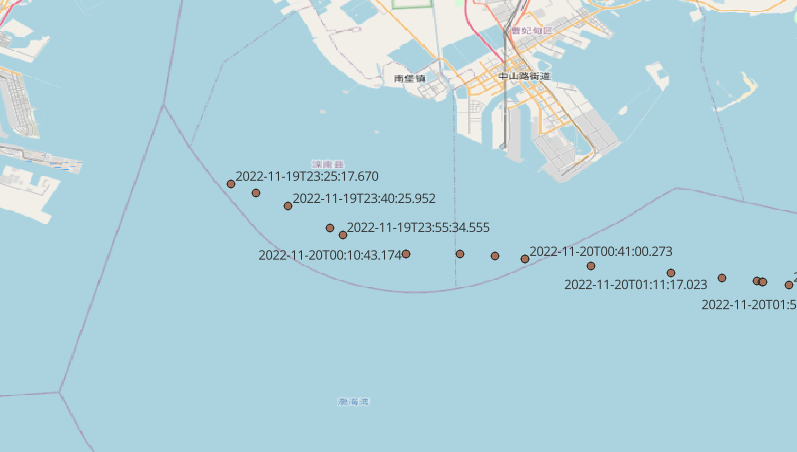

26항차, 출항 전 ETA 변경 후 고정!

In [23]:
CFOS025_df["ETA"].value_counts()

2022-11-07 11:00:00    1800
2022-11-11 11:00:00    1080
2022-11-14 10:00:00     648
2022-11-10 21:00:00     485
2022-11-14 15:00:00     440
2022-11-14 02:00:00     286
2022-11-14 13:00:00     251
2022-11-14 17:00:00     237
2022-11-14 05:00:00     204
2022-11-13 21:00:00      52
2022-11-14 03:00:00      12
2022-11-13 23:00:00       8
2022-11-14 07:00:00       3
Name: ETA, dtype: int64

In [24]:
CFOS025_df_eta_index = CFOS025_df["ETA"].drop_duplicates().index
CFOS025_df.loc[CFOS025_df_eta_index]

,TML_NUM,TML_CD,TML_CUD,VSL_CD,CALL_YEAR,CALL_SEQ,VOYAGE,PTNR_CODE,BERTH_NO,ALONG_SIDE,FROM_BITT,TO_BITT,ETA,ETB,ETW,ETC,ETD,ATA,ATB,ATW,ATC,ATD,YARD_OPEN,YARD_CLOSE,DIS_QTY,LOAD_QTY,UPDATE_TIME,timestamp
0,2237,PNIT,C,CFOS,2022,25,CFOS025,COH,T1,P,NaN,NaN,2022-11-07 11:00:00,2022-11-07 12:00:00,NaN,NaN,2022-11-09 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-07 12:00:00,2022-11-07 02:00:00,1700,900,NaN,2022-10-25 00:01:20.580206
1800,2237,PNIT,U,CFOS,2022,25,CFOS025,COH,OT,P,54.0,70,2022-11-11 11:00:00,2022-11-11 12:00:00,NaN,NaN,2022-11-12 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-08 12:00:00,2022-11-11 02:00:00,1700,900,2022-10-26 15:11:51,2022-10-31 14:11:25.604957
2880,2237,PNIT,U,CFOS,2022,25,CFOS025,COH,T1,P,2.0,18.0,2022-11-10 21:00:00,2022-11-10 22:00:00,NaN,NaN,2022-11-11 22:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-08 12:00:00,2022-11-10 12:00:00,1700,900,2022-11-04 11:31:25,2022-11-04 11:33:00.927175
3365,2237,PNIT,U,CFOS,2022,25,CFOS025,COH,T2,P,24.0,40.0,2022-11-13 21:00:00,2022-11-13 22:00:00,NaN,NaN,2022-11-14 22:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-07 22:00:00,2022-11-13 12:00:00,1700,900,2022-11-07 10:45:06,2022-11-07 10:46:57.274409
3413,2237,PNIT,U,CFOS,2022,25,CFOS025,COH,T2,P,24.0,40.0,2022-11-14 17:00:00,2022-11-14 18:00:00,NaN,NaN,2022-11-15 18:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-10 22:00:00,2022-11-14 08:00:00,1700,900,2022-11-07 14:44:53,2022-11-07 14:47:31.514751
3650,2237,PNIT,U,CFOS,2022,25,CFOS025,COH,T1,P,2.0,18.0,2022-11-14 10:00:00,2022-11-14 11:00:00,NaN,NaN,2022-11-15 11:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-10 22:00:00,2022-11-14 01:00:00,1700,900,2022-11-08 11:27:06,2022-11-08 11:31:53.775748
4259,2237,PNIT,U,CFOS,2022,25,CFOS025,COH,T3,P,45.0,61.0,2022-11-14 07:00:00,2022-11-14 08:00:00,NaN,NaN,2022-11-15 08:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-11 11:00:00,2022-11-13 22:00:00,1700,900,2022-11-10 14:55:29,2022-11-10 14:56:58.950121
4262,2237,PNIT,U,CFOS,2022,25,CFOS025,COH,T2,P,24.0,40.0,2022-11-14 13:00:00,2022-11-14 14:00:00,NaN,NaN,2022-11-15 14:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-11 11:00:00,2022-11-14 04:00:00,1700,900,2022-11-10 15:11:40,2022-11-10 15:12:07.608273
4265,2237,PNIT,U,CFOS,2022,25,CFOS025,COH,T2,P,24.0,40.0,2022-11-14 03:00:00,2022-11-14 04:00:00,NaN,NaN,2022-11-15 04:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-11 11:00:00,2022-11-13 18:00:00,1700,900,2022-11-10 15:23:29,2022-11-10 15:27:17.836465
4277,2237,PNIT,U,CFOS,2022,25,CFOS025,COH,T1,P,2.0,18.0,2022-11-13 23:00:00,2022-11-14 00:00:00,NaN,NaN,2022-11-15 04:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-11 11:00:00,2022-11-13 14:00:00,1700,900,2022-11-10 16:24:16,2022-11-10 16:27:52.542408


In [25]:
cf_port_mis_df[cf_port_mis_df["voyage_name"] == 'VRKR6_2022_25']['port_in_time']

13    2022-11-14 16:20:00
Name: port_in_time, dtype: object

In [26]:
pnit_history = pd.read_excel("pnit_berth_history_2.xlsx")
pnit_history[pnit_history["모선항차"] == "CFOS025"]

,선석,선사,모선항차,선사항차,Head (Bridge) Stern,선명,ROUTE,반입마감시한,접안(예정)일시,출항(예정)일시,양하,적하,Shift,상태
246,T1(P),COH,CFOS025,2245E/2245W,02 (13) 18,COSCO FOS,AK3,2022-11-14 15:00:00,2022-11-14 16:30:00,2022-11-15 14:00:00,1263,1067,0,DEPARTED


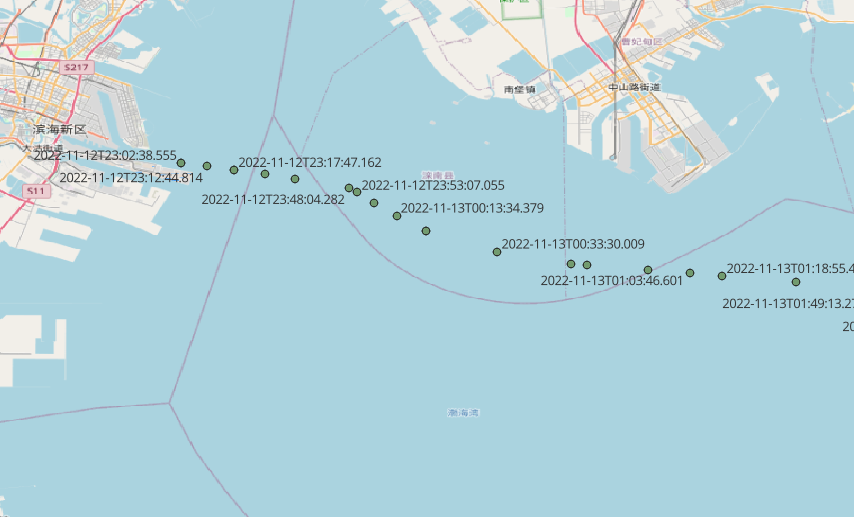
출항 전 ETA 11월 14일 02시   

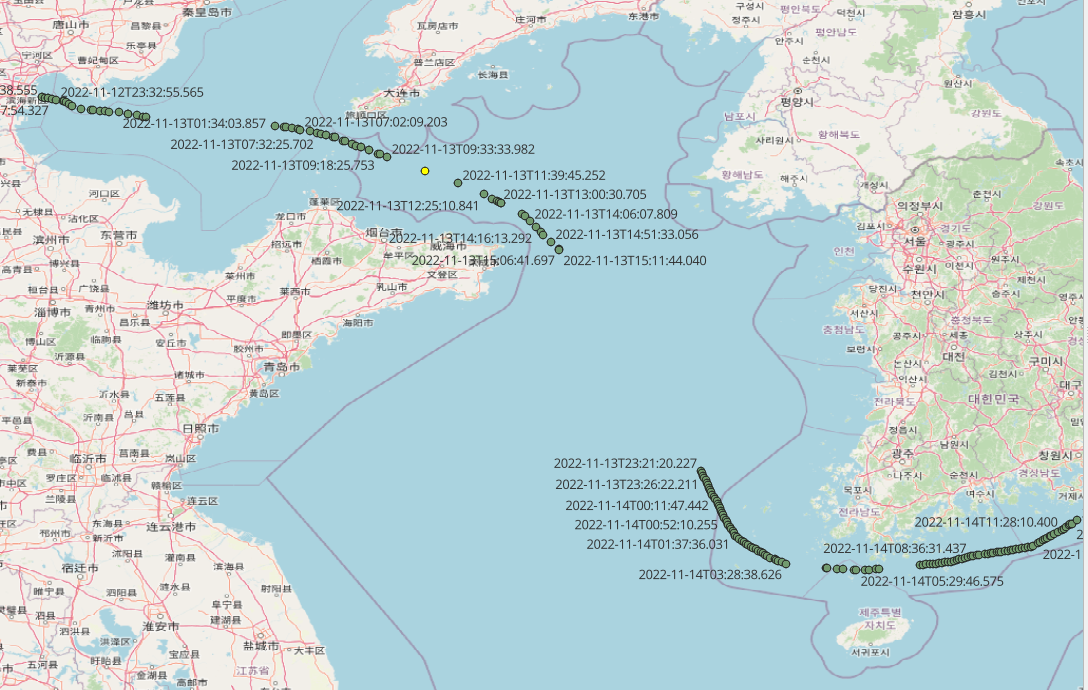

2022-11-13 10:49:06.249518, ETA 2022-11-14 15:00:00

ATB : 2022-11-14 16:20:00

- 23항차
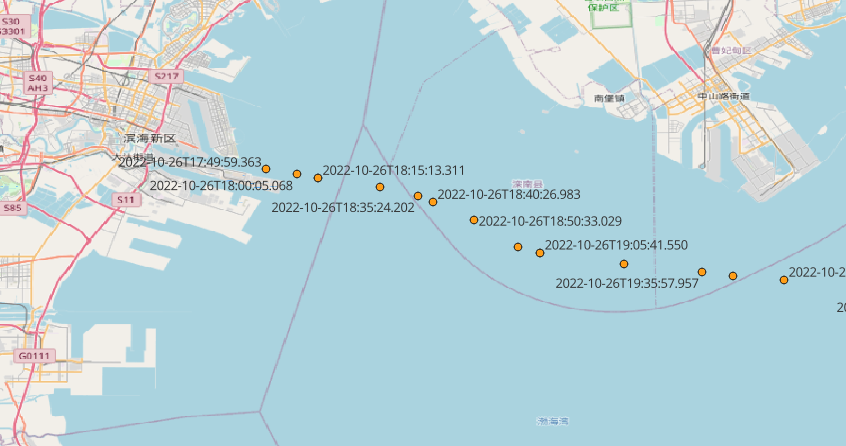

출항 전 ETA 변경 후 고정!

즉, 출발하고 ETA는 계속 고정이라고 생각

In [27]:
CFOS027_df["ETA"].value_counts()

2022-11-21 11:00:00    3019
2022-11-29 23:00:00    1374
2022-11-27 11:00:00     798
2022-11-30 01:00:00     244
2022-11-29 14:00:00     173
Name: ETA, dtype: int64

In [28]:
CFOS027_df_eta_index = CFOS027_df["ETA"].drop_duplicates().index
CFOS027_df.loc[CFOS027_df_eta_index]

,TML_NUM,TML_CD,TML_CUD,VSL_CD,CALL_YEAR,CALL_SEQ,VOYAGE,PTNR_CODE,BERTH_NO,ALONG_SIDE,FROM_BITT,TO_BITT,ETA,ETB,ETW,ETC,ETD,ATA,ATB,ATW,ATC,ATD,YARD_OPEN,YARD_CLOSE,DIS_QTY,LOAD_QTY,UPDATE_TIME,timestamp
0,2239,PNIT,U,CFOS,2022,27,CFOS027,COH,T1,P,NaN,NaN,2022-11-21 11:00:00,2022-11-21 12:00:00,NaN,NaN,2022-11-23 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-18 12:00:00,2022-11-21 02:00:00,1700,900,2022-10-31 10:43:08,2022-11-02 14:47:18.553373
3019,2239,PNIT,U,CFOS,2022,27,CFOS027,COH,OT,P,54.0,70,2022-11-27 11:00:00,2022-11-27 12:00:00,NaN,NaN,2022-11-28 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-18 12:00:00,2022-11-27 02:00:00,1700,900,2022-11-14 12:57:07,2022-11-14 12:58:48.178041
3817,2239,PNIT,U,CFOS,2022,27,CFOS027,COH,T2,P,24.0,40,2022-11-29 23:00:00,2022-11-30 00:00:00,NaN,NaN,2022-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-29 14:00:00,1700,900,2022-11-17 16:02:34,2022-11-17 16:03:56.224836
5191,2239,PNIT,U,CFOS,2022,27,CFOS027,COH,T2,P,30.0,46,2022-11-30 01:00:00,2022-11-30 02:00:00,NaN,NaN,2022-12-01 02:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-27 00:00:00,2022-11-29 16:00:00,1700,900,2022-11-22 14:15:46,2022-11-22 14:17:02.534977
5435,2239,PNIT,U,CFOS,2022,27,CFOS027,COH,T3,P,44.0,60,2022-11-29 14:00:00,2022-11-29 15:00:00,NaN,NaN,2022-11-30 15:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-27 02:00:00,2022-11-29 05:00:00,1700,900,2022-11-23 11:23:20,2022-11-23 11:23:53.634333


In [29]:
cf_port_mis_df[cf_port_mis_df["voyage_name"] == 'VRKR6_2022_27']['port_in_time']

15    2022-11-29 20:50:00
Name: port_in_time, dtype: object

In [30]:
pnit_history = pd.read_excel("pnit_berth_history_2.xlsx")
pnit_history[pnit_history["모선항차"] == "CFOS027"]

,선석,선사,모선항차,선사항차,Head (Bridge) Stern,선명,ROUTE,반입마감시한,접안(예정)일시,출항(예정)일시,양하,적하,Shift,상태
280,T3(P),COH,CFOS027,2248E/2248W,47 (58) 63,COSCO FOS,AK3,2022-11-29 11:00:00,2022-11-29 21:10:00,2022-11-30 10:00:00,782,315,0,DEPARTED


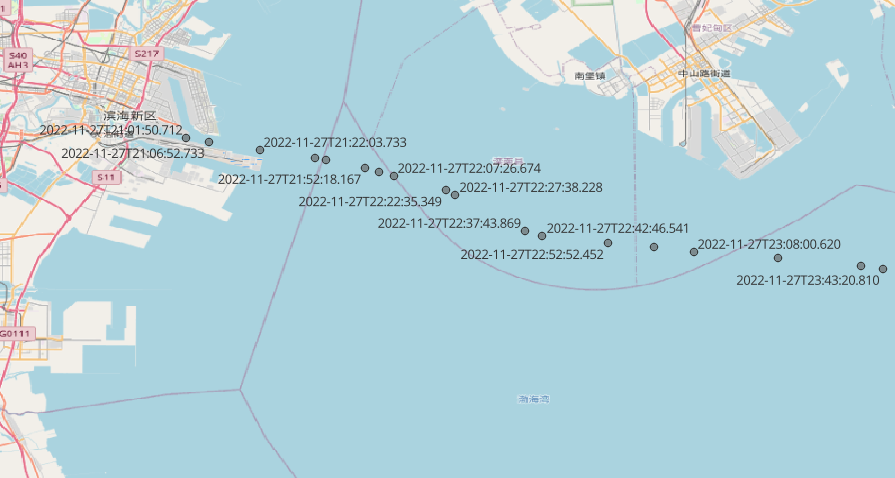


tos_eta 고정 (출항 전부터 변경 x) 2022-11-29 14:00:00

- 26항차 : 4~
- 23항차 : 5~
- 25항차 : 6~
- 27항차 : 7~

# 항차 데이터 확인

## 26항차

In [31]:
cosco_fos_26 = pd.read_csv("실험/exp_result_df_4_1_1_1_seg_100_26")
cosco_fos_26

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
0,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.0773,38.9155,14.7,115.0,2022-11-19 23:25:17.670300,2022-11-19 14:21:02,2022-11-19 02:19:09.000000,under way using engine,1049.748068,1599.023661,2022-11-21 15:13:22.944030,2022-11-21 16:50:10.106911,0 days 01:36:47.162881
1,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1096,38.9041,16.0,115.0,2022-11-19 23:30:20.270660,2022-11-19 14:27:33,2022-11-19 02:19:09.000000,under way using engine,1046.683512,1737.726713,2022-11-21 15:18:25.544390,2022-11-21 16:50:10.106911,0 days 01:31:44.562521
2,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1518,38.8866,15.5,120.0,2022-11-19 23:40:25.952188,2022-11-19 14:36:02,2022-11-19 02:37:12.000000,under way using engine,1042.573266,1673.171691,2022-11-21 15:05:04.220137,2022-11-21 16:50:10.106911,0 days 01:45:05.886774
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2060,38.8583,15.5,126.0,2022-11-19 23:50:31.604903,2022-11-19 14:48:01,2022-11-19 02:37:12.000000,under way using engine,1037.056975,1664.318883,2022-11-21 15:15:09.872852,2022-11-21 16:50:10.106911,0 days 01:35:00.234059
4,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2230,38.8488,15.3,113.0,2022-11-19 23:55:34.554597,2022-11-19 14:51:38.000000,2022-11-19 02:55:09.000000,under way using engine,1035.301317,1639.532376,2022-11-21 14:53:57.060978,2022-11-21 16:50:10.106911,0 days 01:56:13.045933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8453,34.8092,9.0,2.0,2022-11-21 16:04:44.580934,2022-11-21 06:43:45.000000,2022-11-21 06:31:07.000000,under way using engine,17.990854,22.562173,NaN,2022-11-21 16:50:10.106911,NaN
286,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8511,34.8521,8.8,0.0,2022-11-21 16:19:52.596682,2022-11-21 06:58:54,2022-11-21 06:55:09.000000,under way using engine,13.380367,16.833685,NaN,2022-11-21 16:50:10.106911,NaN
287,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8510,34.8628,9.4,1.0,2022-11-21 16:25:00.575389,2022-11-21 07:03:11.000000,2022-11-21 06:55:09.000000,under way using engine,12.219086,15.270903,NaN,2022-11-21 16:50:10.106911,NaN
288,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8493,34.8922,9.4,340.0,2022-11-21 16:35:01.296680,2022-11-21 07:14:04.000000,2022-11-21 07:13:06.000000,under way using engine,9.026448,11.280878,NaN,2022-11-21 16:50:10.106911,NaN


In [32]:
cosco_fos_23 = pd.read_csv("실험/exp_result_df_5_1_1_1_seg_100_23")
cosco_fos_23

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
0,COSCO FOS,477947700,9484302.0,4253,KRBNP,10280300,117.8634,38.9592,12.9,102.0,2022-10-26 17:49:59.362708,2022-10-26 08:47:14,2022-10-26 08:37:10.000000,under way using engine,1068.751693,1468.013216,2022-10-28 10:02:38.044923,2022-10-28 10:23:54.026414,0 days 00:21:15.981491
1,COSCO FOS,477947700,9484302.0,4253,KRBNP,10280300,117.9035,38.9530,12.9,102.0,2022-10-26 18:00:05.068119,2022-10-26 08:56:22.000000,2022-10-26 08:37:10.000000,under way using engine,1065.269204,1463.229748,2022-10-28 10:12:43.750334,2022-10-28 10:23:54.026414,0 days 00:11:10.276080
2,COSCO FOS,477947700,9484302.0,4253,KRBNP,10280300,117.9320,38.9485,14.5,102.0,2022-10-26 18:05:07.298680,2022-10-26 09:02:14.000000,2022-10-26 08:37:10.000000,under way using engine,1062.790555,1598.686641,2022-10-28 10:17:45.980895,2022-10-28 10:23:54.026414,0 days 00:06:08.045519
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,10280300,118.0123,38.9367,14.3,102.0,2022-10-26 18:20:15.735745,2022-10-26 09:17:39,2022-10-26 09:13:07.000000,under way using engine,1055.843274,1568.768808,2022-10-28 10:08:21.009475,2022-10-28 10:23:54.026414,0 days 00:15:33.016939
4,COSCO FOS,477947700,9484302.0,4253,KRBNP,10280300,118.0623,38.9239,7.9,115.0,2022-10-26 18:35:24.201537,2022-10-26 09:32:47.000000,2022-10-26 09:31:09.000000,under way using engine,1051.296999,1359.529438,2022-10-28 10:23:29.475267,2022-10-28 10:23:54.026414,0 days 00:00:24.551147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,COSCO FOS,477947700,9484302.0,4253,KRBNP,10280150,128.8506,34.8311,12.5,13.0,2022-10-28 09:53:37.080576,2022-10-28 00:53:05.000000,2022-10-28 12:31:06.000000,under way using engine,15.660330,21.098739,NaN,2022-10-28 10:23:54.026414,NaN
225,COSCO FOS,477947700,9484302.0,4253,KRBNP,10280150,128.8553,34.8501,11.8,13.0,2022-10-28 10:03:43.154063,2022-10-28 00:58:36.000000,2022-10-28 12:31:06.000000,under way using engine,13.684020,17.898188,NaN,2022-10-28 10:23:54.026414,NaN
226,COSCO FOS,477947700,9484302.0,4253,KRBNP,10280150,128.8602,34.8706,11.2,8.0,2022-10-28 10:08:45.356287,2022-10-28 01:05:13,2022-10-28 01:07:06.000000,under way using engine,11.618385,14.889828,NaN,2022-10-28 10:23:54.026414,NaN
227,COSCO FOS,477947700,9484302.0,4253,KRBNP,10280150,128.8576,34.8977,11.7,350.0,2022-10-28 10:18:51.270027,2022-10-28 01:14:05.000000,2022-10-28 01:07:06.000000,under way using engine,8.718571,11.360994,NaN,2022-10-28 10:23:54.026414,NaN


In [33]:
cosco_fos_25 = pd.read_csv("실험/exp_result_df_6_1_1_1_seg_100_25")
cosco_fos_25

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
0,COSCO FOS,477947700,9484302.0,4253,KRBNP,11140800,117.8129,38.9667,9.7,101.0,2022-11-12 22:47:30.142553,2022-11-12 13:47:12,2022-11-12 01:29:19.000000,under way using engine,1073.125529,1340.873800,2022-11-14 15:00:08.824768,2022-11-14 14:29:52.786142,0 days 00:30:16.038626
1,COSCO FOS,477947700,9484302.0,4253,KRBNP,11140600,117.8688,38.9578,12.4,100.0,2022-11-12 23:02:38.554501,2022-11-12 14:00:34,2022-11-12 01:55:09.000000,under way using engine,1068.260054,1432.668366,2022-11-14 15:15:17.236716,2022-11-14 14:29:52.786142,0 days 00:45:24.450574
2,COSCO FOS,477947700,9484302.0,4253,KRBNP,11140600,117.9026,38.9531,12.7,101.0,2022-11-12 23:12:44.814106,2022-11-12 14:08:21,2022-11-12 02:07:07.000000,under way using engine,1065.345788,1448.963869,2022-11-14 15:25:23.496321,2022-11-14 14:29:52.786142,0 days 00:55:30.710179
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11140600,117.9384,38.9479,14.5,99.0,2022-11-12 23:17:47.161732,2022-11-12 14:15:47,2022-11-12 02:07:07.000000,under way using engine,1062.250502,1597.874275,2022-11-14 15:30:25.843947,2022-11-14 14:29:52.786142,0 days 01:00:33.057805
4,COSCO FOS,477947700,9484302.0,4253,KRBNP,11140600,117.9789,38.9423,14.8,102.0,2022-11-12 23:27:54.327480,2022-11-12 14:23:39.000000,2022-11-12 02:25:09.000000,under way using engine,1058.760673,1623.040180,2022-11-14 15:40:33.009695,2022-11-14 14:29:52.786142,0 days 01:10:40.223553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,COSCO FOS,477947700,9484302.0,4253,KRBNP,11140550,128.8507,34.8480,10.0,5.0,2022-11-14 13:59:34.961439,2022-11-14 04:56:33.000000,2022-11-14 04:55:08.000000,under way using engine,13.818333,17.295579,NaN,2022-11-14 14:29:52.786142,NaN
190,COSCO FOS,477947700,9484302.0,4253,KRBNP,11140550,128.8499,34.8694,9.5,357.0,2022-11-14 14:09:41.042274,2022-11-14 05:04:39.000000,2022-11-14 04:55:08.000000,under way using engine,11.482433,14.346133,NaN,2022-11-14 14:29:52.786142,NaN
191,COSCO FOS,477947700,9484302.0,4253,KRBNP,11140550,128.8500,34.8889,9.6,5.0,2022-11-14 14:14:44.537214,2022-11-14 05:12:12.000000,2022-11-14 04:55:08.000000,under way using engine,9.395706,11.738199,NaN,2022-11-14 14:29:52.786142,NaN
192,COSCO FOS,477947700,9484302.0,4253,KRBNP,11140550,128.8491,34.9116,8.4,338.0,2022-11-14 14:24:49.637934,2022-11-14 05:21:00.000000,2022-11-14 05:19:05.000000,under way using engine,6.992708,8.881090,NaN,2022-11-14 14:29:52.786142,NaN


In [34]:
cosco_fos_27 = pd.read_csv("실험/exp_result_df_7_1_1_1_seg_100_27")
cosco_fos_27

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
0,COSCO FOS,477947700,9484302.0,4253,KRBNP,11290400,117.7846,38.9717,9.3,102.0,2022-11-27 21:01:50.712009,2022-11-27 11:57:43.000000,2022-11-27 11:43:07.000000,under way using engine,1075.608648,1344.942290,2022-11-29 13:14:29.394224,2022-11-29 19:11:21.050796,0 days 05:56:51.656572
1,COSCO FOS,477947700,9484302.0,4253,KRBNP,11290400,117.8137,38.9663,11.6,104.0,2022-11-27 21:06:52.733478,2022-11-27 12:05:36.000000,2022-11-27 11:43:07.000000,under way using engine,1073.045003,1393.228085,2022-11-29 13:19:31.415693,2022-11-29 19:11:21.050796,0 days 05:51:49.635103
2,COSCO FOS,477947700,9484302.0,4253,KRBNP,11290400,117.8799,38.9563,13.0,100.0,2022-11-27 21:22:03.733064,2022-11-27 12:20:36.000000,2022-11-27 12:07:08.000000,under way using engine,1067.304711,1473.489660,2022-11-29 13:34:42.415279,2022-11-29 19:11:21.050796,0 days 05:36:38.635517
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11290400,117.9522,38.9457,14.9,101.0,2022-11-27 21:37:09.877597,2022-11-27 12:35:50.000000,2022-11-27 12:25:05.000000,under way using engine,1061.049553,1637.007820,2022-11-29 13:49:48.559812,2022-11-29 19:11:21.050796,0 days 05:21:32.490984
4,COSCO FOS,477947700,9484302.0,4253,KRBNP,11290400,117.9665,38.9433,14.7,101.0,2022-11-27 21:42:12.932689,2022-11-27 12:38:44.000000,2022-11-27 12:25:05.000000,under way using engine,1059.800276,1614.335638,2022-11-29 13:54:51.614904,2022-11-29 19:11:21.050796,0 days 05:16:29.435892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,COSCO FOS,477947700,9484302.0,4253,KRBNP,1291100,128.8858,34.8248,14.3,355.0,2022-11-29 18:51:13.776738,2022-11-29 09:48:25.000000,2022-11-29 09:49:05.000000,under way using engine,17.200573,25.556560,NaN,2022-11-29 19:11:21.050796,NaN
247,COSCO FOS,477947700,9484302.0,4253,KRBNP,1291100,128.8826,34.8445,14.3,344.0,2022-11-29 18:56:17.991105,2022-11-29 09:53:20.000000,2022-11-29 09:55:05.000000,under way using engine,15.055345,22.369188,NaN,2022-11-29 19:11:21.050796,NaN
248,COSCO FOS,477947700,9484302.0,4253,KRBNP,1291100,128.8791,34.8556,14.3,340.0,2022-11-29 19:01:17.837399,2022-11-29 09:56:20.000000,2022-11-29 10:01:06.000000,under way using engine,13.793852,20.494865,NaN,2022-11-29 19:11:21.050796,NaN
249,COSCO FOS,477947700,9484302.0,4253,KRBNP,1291100,128.8655,34.8852,12.8,335.0,2022-11-29 19:06:18.922598,2022-11-29 10:04:44.000000,2022-11-29 10:01:06.000000,under way using engine,10.281083,14.051663,NaN,2022-11-29 19:11:21.050796,NaN


In [35]:
cosco_fos_26["timestamp"] =pd.to_datetime(cosco_fos_26["timestamp"])
cosco_fos_26["error"] =pd.to_timedelta(cosco_fos_26["error"])
cosco_fos_26["ETA"] =pd.to_datetime(cosco_fos_26["ETA"])
cosco_fos_26["ATA"] =pd.to_datetime(cosco_fos_26["ATA"])
cosco_fos_26["time_position_data_received"] =pd.to_datetime(cosco_fos_26["time_position_data_received"])
cosco_fos_26["time_voyage_data_received"] =pd.to_datetime(cosco_fos_26["time_voyage_data_received"])
cosco_fos_26 = cosco_fos_26.loc[cosco_fos_26[["ETA", "error"]].dropna().index]
cosco_fos_26.reset_index(inplace=True)
cosco_fos_26["eta"] = cosco_fos_26["eta"].astype(str)
cosco_fos_26["ais_eta"] = cosco_fos_26["eta"].apply(lambda x: '2022-'+x[:2]+"-"+x[2:4]+" "+x[4:6] + ":" + x[6:8] + ":00")
cosco_fos_26["ais_eta"] =pd.to_datetime(cosco_fos_26["ais_eta"])


In [36]:
cosco_fos_25["timestamp"] =pd.to_datetime(cosco_fos_25["timestamp"])
cosco_fos_25["error"] =pd.to_timedelta(cosco_fos_25["error"])
cosco_fos_25["ETA"] =pd.to_datetime(cosco_fos_25["ETA"])
cosco_fos_25["ATA"] =pd.to_datetime(cosco_fos_25["ATA"])
cosco_fos_25["time_position_data_received"] =pd.to_datetime(cosco_fos_25["time_position_data_received"])
cosco_fos_25["time_voyage_data_received"] =pd.to_datetime(cosco_fos_25["time_voyage_data_received"])
cosco_fos_25 = cosco_fos_25.loc[cosco_fos_25[["ETA", "error"]].dropna().index]
cosco_fos_25.reset_index(inplace=True)
cosco_fos_25["eta"] = cosco_fos_25["eta"].astype(str)
cosco_fos_25["ais_eta"] = cosco_fos_25["eta"].apply(lambda x: '2022-'+x[:2]+"-"+x[2:4]+" "+x[4:6] + ":" + x[6:8] + ":00")
cosco_fos_25["ais_eta"] =pd.to_datetime(cosco_fos_25["ais_eta"])


In [37]:
cosco_fos_23["timestamp"] =pd.to_datetime(cosco_fos_23["timestamp"])
cosco_fos_23["error"] =pd.to_timedelta(cosco_fos_23["error"])
cosco_fos_23["ETA"] =pd.to_datetime(cosco_fos_23["ETA"])
cosco_fos_23["ATA"] =pd.to_datetime(cosco_fos_23["ATA"])
cosco_fos_23["time_position_data_received"] =pd.to_datetime(cosco_fos_23["time_position_data_received"])
cosco_fos_23["time_voyage_data_received"] =pd.to_datetime(cosco_fos_23["time_voyage_data_received"])
cosco_fos_23 = cosco_fos_23.loc[cosco_fos_23[["ETA", "error"]].dropna().index]
cosco_fos_23.reset_index(inplace=True)
cosco_fos_23["eta"] = cosco_fos_23["eta"].astype(str)
cosco_fos_23["ais_eta"] = cosco_fos_23["eta"].apply(lambda x: '2022-'+x[:2]+"-"+x[2:4]+" "+x[4:6] + ":" + x[6:8] + ":00")
cosco_fos_23["ais_eta"] =pd.to_datetime(cosco_fos_23["ais_eta"])


In [38]:
cosco_fos_27["timestamp"] =pd.to_datetime(cosco_fos_27["timestamp"])
cosco_fos_27["error"] =pd.to_timedelta(cosco_fos_27["error"])
cosco_fos_27["ETA"] =pd.to_datetime(cosco_fos_27["ETA"])
cosco_fos_27["ATA"] =pd.to_datetime(cosco_fos_27["ATA"])
cosco_fos_27["time_position_data_received"] =pd.to_datetime(cosco_fos_27["time_position_data_received"])
cosco_fos_27["time_voyage_data_received"] =pd.to_datetime(cosco_fos_27["time_voyage_data_received"])
cosco_fos_27 = cosco_fos_27.loc[cosco_fos_27[["ETA", "error"]].dropna().index]
cosco_fos_27.reset_index(inplace=True)
cosco_fos_27["eta"] = cosco_fos_27["eta"].astype(str)
cosco_fos_27.loc[cosco_fos_27[cosco_fos_27["eta"] == '1291100'].index,"eta"] = '11291100'

cosco_fos_27["ais_eta"] = cosco_fos_27["eta"].apply(lambda x: '2022-'+x[:2]+"-"+x[2:4]+" "+x[4:6] + ":" + x[6:8] + ":00")
cosco_fos_27["ais_eta"] =pd.to_datetime(cosco_fos_27["ais_eta"])


In [39]:
cosco_fos_26["ais_eta"].value_counts()

2022-11-21 08:00:00    282
Name: ais_eta, dtype: int64

In [40]:
cosco_fos_25["ais_eta"].value_counts()

2022-11-14 06:00:00    179
2022-11-14 05:50:00      6
2022-11-14 08:00:00      1
Name: ais_eta, dtype: int64

In [41]:
cosco_fos_25_eta_index = cosco_fos_25["ais_eta"].drop_duplicates().index
cosco_fos_25.loc[cosco_fos_25_eta_index]

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error,ais_eta
0,0,COSCO FOS,477947700,9484302.0,4253,KRBNP,11140800,117.8129,38.9667,9.7,101.0,2022-11-12 22:47:30.142553,2022-11-12 13:47:12,2022-11-12 01:29:19,under way using engine,1073.125529,1340.873800,2022-11-14 15:00:08.824768,2022-11-14 14:29:52.786142,0 days 00:30:16.038626,2022-11-14 08:00:00
1,1,COSCO FOS,477947700,9484302.0,4253,KRBNP,11140600,117.8688,38.9578,12.4,100.0,2022-11-12 23:02:38.554501,2022-11-12 14:00:34,2022-11-12 01:55:09,under way using engine,1068.260054,1432.668366,2022-11-14 15:15:17.236716,2022-11-14 14:29:52.786142,0 days 00:45:24.450574,2022-11-14 06:00:00
180,180,COSCO FOS,477947700,9484302.0,4253,KRBNP,11140550,128.8196,34.6564,12.2,14.0,2022-11-14 12:59:01.342478,2022-11-14 03:55:44,2022-11-14 03:54:43,under way using engine,34.826302,46.296315,2022-11-14 14:11:52.983566,2022-11-14 14:29:52.786142,0 days 00:17:59.802576,2022-11-14 05:50:00


In [42]:
cosco_fos_23["ais_eta"].value_counts()

2022-10-28 03:00:00    160
2022-10-28 02:00:00     61
Name: ais_eta, dtype: int64

In [43]:
cosco_fos_23_eta_index = cosco_fos_23["ais_eta"].drop_duplicates().index
cosco_fos_23.loc[cosco_fos_23_eta_index]

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error,ais_eta
0,0,COSCO FOS,477947700,9484302.0,4253,KRBNP,10280300,117.8634,38.9592,12.9,102.0,2022-10-26 17:49:59.362708,2022-10-26 08:47:14,2022-10-26 08:37:10,under way using engine,1068.751693,1468.013216,2022-10-28 10:02:38.044923,2022-10-28 10:23:54.026414,0 days 00:21:15.981491,2022-10-28 03:00:00
160,160,COSCO FOS,477947700,9484302.0,4253,KRBNP,10280200,127.3608,34.1075,16.0,69.0,2022-10-28 03:35:06.260485,2022-10-27 18:34:21,2022-10-27 06:31:09,under way using engine,164.435721,272.999758,2022-10-28 09:58:27.875193,2022-10-28 10:23:54.026414,0 days 00:25:26.151221,2022-10-28 02:00:00


In [44]:
cosco_fos_27["ais_eta"].value_counts()

2022-11-29 04:00:00    153
2022-11-29 12:00:00     83
2022-11-29 11:00:00      7
Name: ais_eta, dtype: int64

In [45]:
cosco_fos_27_eta_index = cosco_fos_27["ais_eta"].drop_duplicates().index
cosco_fos_27.loc[cosco_fos_27_eta_index]

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error,ais_eta
0,0,COSCO FOS,477947700,9484302.0,4253,KRBNP,11290400,117.7846,38.9717,9.3,102.0,2022-11-27 21:01:50.712009,2022-11-27 11:57:43,2022-11-27 11:43:07,under way using engine,1075.608648,1344.942290,2022-11-29 13:14:29.394224,2022-11-29 19:11:21.050796,0 days 05:56:51.656572,2022-11-29 04:00:00
153,153,COSCO FOS,477947700,9484302.0,4253,KRBNP,11291200,126.5492,33.8040,14.2,91.0,2022-11-29 07:47:11.163803,2022-11-28 22:43:10,2022-11-28 10:43:07,under way using engine,245.341381,362.319053,2022-11-29 17:03:10.721582,2022-11-29 19:11:21.050796,0 days 02:08:10.329214,2022-11-29 12:00:00
236,236,COSCO FOS,477947700,9484302.0,4253,KRBNP,11291100,128.6886,34.5360,19.5,52.0,2022-11-29 17:25:42.734120,2022-11-29 08:23:27,2022-11-29 08:25:06,under way using engine,49.674089,106.027233,2022-11-29 19:26:04.502671,2022-11-29 19:11:21.050796,0 days 00:14:43.451875,2022-11-29 11:00:00


# 입항 후 대기 여부

감속하지 않는 경우, 감속하는 경우 판단. 속도를 얼마동안 감속하는지 확인

In [46]:
from matplotlib.ticker import MultipleLocator, IndexLocator, FuncFormatter
from matplotlib.dates import MonthLocator, DateFormatter

In [47]:
import seaborn as sns

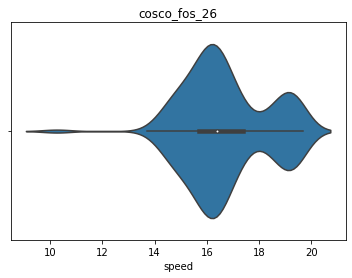

In [48]:
# use the seaborn violinplot function to visualize the distribution of the speed values
sns.violinplot(data=cosco_fos_26, x='speed')
plt.title("cosco_fos_26")

plt.show()

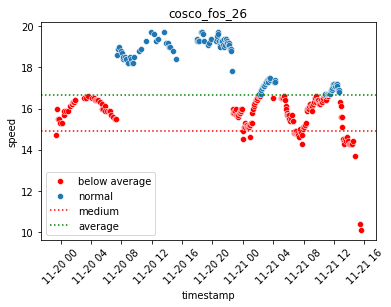

In [49]:
sns.scatterplot(
    data=cosco_fos_26[cosco_fos_26["speed"] < cosco_fos_26["speed"].mean()],
    x='timestamp',
    y='speed',
    color="red",
    label="below average")
sns.scatterplot(
    data=cosco_fos_26[cosco_fos_26["speed"] >= cosco_fos_26["speed"].mean()],
    x='timestamp',
    y='speed',
    label="normal")
plt.title("cosco_fos_26")
plt.xticks(rotation=45)
# plt.axvline(x=cosco_fos_26["timestamp"].values[0],
#             color="pink",
#             linestyle="dashed",
#             label="dfdf")
# plt.axvline(x=cosco_fos_26["timestamp"].values[-1],
#             color="pink",
#             linestyle="dashed")
# plt.axhline(y=cosco_fos_23["speed"].mean(), linestyle="dotted")
plt.axhline(y=(cosco_fos_26["speed"].max() + cosco_fos_26["speed"].min()) / 2,
            linestyle="dotted",
            label="medium",
            color="red",
            )
plt.axhline(y=cosco_fos_26["speed"].mean(),
            linestyle="dotted",
            label="average",
            color="green",
            )
# use the seaborn violinplot function to visualize the distribution of the speed values
# sns.violinplot(data=cosco_fos_23, x='index', y='speed', inner="stick")
plt.legend()
plt.show()

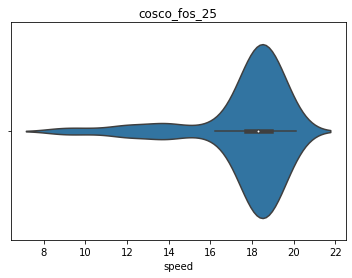

In [50]:
# use the seaborn violinplot function to visualize the distribution of the speed values
sns.violinplot(data=cosco_fos_25, x='speed')
plt.title("cosco_fos_25")

plt.show()

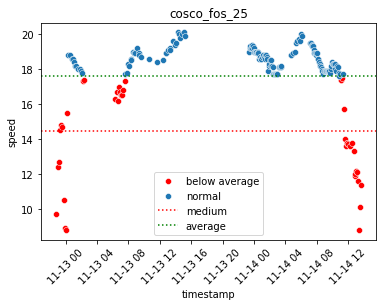

In [51]:
sns.scatterplot(
    data=cosco_fos_25[cosco_fos_25["speed"] < cosco_fos_25["speed"].mean()],
    x='timestamp',
    y='speed',
    color="red",
    label="below average")
sns.scatterplot(
    data=cosco_fos_25[cosco_fos_25["speed"] >= cosco_fos_25["speed"].mean()],
    x='timestamp',
    y='speed',
    label="normal")
plt.title("cosco_fos_25")
plt.xticks(rotation=45)
# plt.axvline(x=cosco_fos_25["timestamp"].values[0],
#             color="pink",
#             linestyle="dashed",
#             label="dfdf")
# plt.axvline(x=cosco_fos_25["timestamp"].values[-1],
#             color="pink",
#             linestyle="dashed")
# plt.axhline(y=cosco_fos_23["speed"].mean(), linestyle="dotted")
plt.axhline(y=(cosco_fos_25["speed"].max() + cosco_fos_25["speed"].min()) / 2,
            linestyle="dotted",
            label="medium",
            color="red",
            )
plt.axhline(y=cosco_fos_25["speed"].mean(),
            linestyle="dotted",
            label="average",
            color="green",
            )
# use the seaborn violinplot function to visualize the distribution of the speed values
# sns.violinplot(data=cosco_fos_23, x='index', y='speed', inner="stick")
plt.legend()
plt.show()

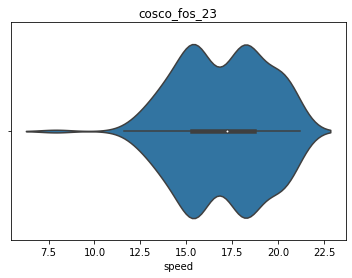

In [52]:
# use the seaborn violinplot function to visualize the distribution of the speed values
sns.violinplot(data=cosco_fos_23, x='speed')
plt.title("cosco_fos_23")

plt.show()

In [53]:
cosco_fos_23[cosco_fos_23["speed"] < cosco_fos_23["speed"].mean()]

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error,ais_eta
0,0,COSCO FOS,477947700,9484302.0,4253,KRBNP,10280300,117.8634,38.9592,12.9,102.0,2022-10-26 17:49:59.362708,2022-10-26 08:47:14,2022-10-26 08:37:10,under way using engine,1068.751693,1468.013216,2022-10-28 10:02:38.044923,2022-10-28 10:23:54.026414,0 days 00:21:15.981491,2022-10-28 03:00:00
1,1,COSCO FOS,477947700,9484302.0,4253,KRBNP,10280300,117.9035,38.9530,12.9,102.0,2022-10-26 18:00:05.068119,2022-10-26 08:56:22,2022-10-26 08:37:10,under way using engine,1065.269204,1463.229748,2022-10-28 10:12:43.750334,2022-10-28 10:23:54.026414,0 days 00:11:10.276080,2022-10-28 03:00:00
2,2,COSCO FOS,477947700,9484302.0,4253,KRBNP,10280300,117.9320,38.9485,14.5,102.0,2022-10-26 18:05:07.298680,2022-10-26 09:02:14,2022-10-26 08:37:10,under way using engine,1062.790555,1598.686641,2022-10-28 10:17:45.980895,2022-10-28 10:23:54.026414,0 days 00:06:08.045519,2022-10-28 03:00:00
3,3,COSCO FOS,477947700,9484302.0,4253,KRBNP,10280300,118.0123,38.9367,14.3,102.0,2022-10-26 18:20:15.735745,2022-10-26 09:17:39,2022-10-26 09:13:07,under way using engine,1055.843274,1568.768808,2022-10-28 10:08:21.009475,2022-10-28 10:23:54.026414,0 days 00:15:33.016939,2022-10-28 03:00:00
4,4,COSCO FOS,477947700,9484302.0,4253,KRBNP,10280300,118.0623,38.9239,7.9,115.0,2022-10-26 18:35:24.201537,2022-10-26 09:32:47,2022-10-26 09:31:09,under way using engine,1051.296999,1359.529438,2022-10-28 10:23:29.475267,2022-10-28 10:23:54.026414,0 days 00:00:24.551147,2022-10-28 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,216,COSCO FOS,477947700,9484302.0,4253,KRBNP,10280200,128.7885,34.6213,12.7,47.0,2022-10-28 08:48:00.023766,2022-10-27 23:42:53,2022-10-27 11:25:07,under way using engine,38.832222,52.815234,2022-10-28 10:00:51.664854,2022-10-28 10:23:54.026414,0 days 00:23:02.361560,2022-10-28 02:00:00
217,217,COSCO FOS,477947700,9484302.0,4253,KRBNP,10280200,128.8115,34.6455,11.6,29.0,2022-10-28 08:53:02.895643,2022-10-27 23:52:48,2022-10-27 11:25:07,under way using engine,36.045634,46.801196,2022-10-28 10:05:54.536731,2022-10-28 10:23:54.026414,0 days 00:17:59.489683,2022-10-28 02:00:00
218,218,COSCO FOS,477947700,9484302.0,4253,KRBNP,10280200,128.8255,34.6687,13.1,30.0,2022-10-28 09:03:08.721024,2022-10-28 00:00:12,2022-10-28 12:01:09,under way using engine,33.463157,46.437742,2022-10-28 10:16:00.362112,2022-10-28 10:23:54.026414,0 days 00:07:53.664302,2022-10-28 02:00:00
219,219,COSCO FOS,477947700,9484302.0,4253,KRBNP,10280200,128.8371,34.7124,13.7,7.0,2022-10-28 09:13:14.237569,2022-10-28 00:12:18,2022-10-28 12:01:09,under way using engine,28.644700,41.076774,2022-10-28 10:01:31.213968,2022-10-28 10:23:54.026414,0 days 00:22:22.812446,2022-10-28 02:00:00


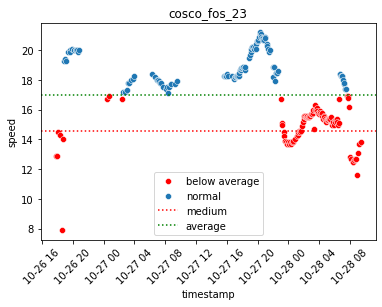

In [54]:
sns.scatterplot(
    data=cosco_fos_23[cosco_fos_23["speed"] < cosco_fos_23["speed"].mean()],
    x='timestamp',
    y='speed',
    color="red",
    label="below average")
sns.scatterplot(
    data=cosco_fos_23[cosco_fos_23["speed"] >= cosco_fos_23["speed"].mean()],
    x='timestamp',
    y='speed',
    label="normal")
plt.title("cosco_fos_23")
plt.xticks(rotation=45)
# plt.axvline(x=cosco_fos_23["timestamp"].values[0],
#             color="pink",
#             linestyle="dashed",
#             label="dfdf")
# plt.axvline(x=cosco_fos_23["timestamp"].values[-1],
#             color="pink",
#             linestyle="dashed")
# plt.axhline(y=cosco_fos_23["speed"].mean(), linestyle="dotted")
plt.axhline(
    y=(cosco_fos_23["speed"].max() + cosco_fos_23["speed"].min()) / 2,
    linestyle="dotted",
    label="medium",
    color="red",
)
plt.axhline(
    y=cosco_fos_23["speed"].mean(),
    linestyle="dotted",
    label="average",
    color="green",
)
# use the seaborn violinplot function to visualize the distribution of the speed values
# sns.violinplot(data=cosco_fos_23, x='index', y='speed', inner="stick")
plt.legend()
plt.show()

In [55]:
# sns.scatterplot(data=cosco_fos_23, x='time_left_to_arriving', y='speed')
# plt.title("cosco_fos_23")
# plt.xticks(rotation=45)
# # plt.axvline(x=cosco_fos_23["timestamp"].values[0],
# #             color="pink",
# #             linestyle="dashed",
# #             label="dfdf")
# # plt.axvline(x=cosco_fos_23["timestamp"].values[-1],
# #             color="pink",
# #             linestyle="dashed")
# # plt.axhline(y=cosco_fos_23["speed"].mean(), linestyle="dotted")
# plt.axhline(y=(cosco_fos_23["speed"].max() + cosco_fos_23["speed"].min()) / 2,
#             linestyle="dotted",
#             label="medium",
#             color="red",
#             )
# plt.axhline(y=cosco_fos_23["speed"].mean(),
#             linestyle="dotted",
#             label="average",
#             color="green",
#             )
# # use the seaborn violinplot function to visualize the distribution of the speed values
# # sns.violinplot(data=cosco_fos_23, x='index', y='speed', inner="stick")
# plt.legend()
# plt.show()

In [56]:
cosco_fos_23['time_left_to_arriving']=cosco_fos_23["timestamp"] - cosco_fos_23["ATA"]

In [57]:
cosco_fos_23['time_left_to_arriving']

0     -2 days +07:26:05.336294
1     -2 days +07:36:11.041705
2     -2 days +07:41:13.272266
3     -2 days +07:56:21.709331
4     -2 days +08:11:30.175123
                ...           
216   -1 days +22:24:05.997352
217   -1 days +22:29:08.869229
218   -1 days +22:39:14.694610
219   -1 days +22:49:20.211155
220   -1 days +22:59:29.663009
Name: time_left_to_arriving, Length: 221, dtype: timedelta64[ns]

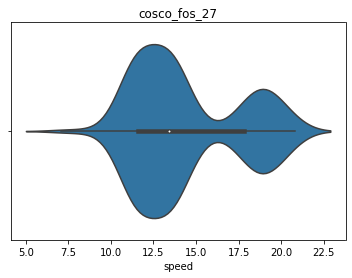

In [58]:
# use the seaborn violinplot function to visualize the distribution of the speed values
sns.violinplot(data=cosco_fos_27, x='speed')
plt.title("cosco_fos_27")

plt.show()

In [59]:
cosco_fos_27[cosco_fos_27["speed"] < cosco_fos_27["speed"].mean()]

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error,ais_eta
0,0,COSCO FOS,477947700,9484302.0,4253,KRBNP,11290400,117.7846,38.9717,9.3,102.0,2022-11-27 21:01:50.712009,2022-11-27 11:57:43,2022-11-27 11:43:07,under way using engine,1075.608648,1344.942290,2022-11-29 13:14:29.394224,2022-11-29 19:11:21.050796,0 days 05:56:51.656572,2022-11-29 04:00:00
1,1,COSCO FOS,477947700,9484302.0,4253,KRBNP,11290400,117.8137,38.9663,11.6,104.0,2022-11-27 21:06:52.733478,2022-11-27 12:05:36,2022-11-27 11:43:07,under way using engine,1073.045003,1393.228085,2022-11-29 13:19:31.415693,2022-11-29 19:11:21.050796,0 days 05:51:49.635103,2022-11-29 04:00:00
2,2,COSCO FOS,477947700,9484302.0,4253,KRBNP,11290400,117.8799,38.9563,13.0,100.0,2022-11-27 21:22:03.733064,2022-11-27 12:20:36,2022-11-27 12:07:08,under way using engine,1067.304711,1473.489660,2022-11-29 13:34:42.415279,2022-11-29 19:11:21.050796,0 days 05:36:38.635517,2022-11-29 04:00:00
5,5,COSCO FOS,477947700,9484302.0,4253,KRBNP,11290400,118.0178,38.9325,8.1,119.0,2022-11-27 21:52:18.166868,2022-11-27 12:51:06,2022-11-27 12:43:11,under way using engine,1055.230216,1353.620444,2022-11-29 13:40:23.440598,2022-11-29 19:11:21.050796,0 days 05:30:57.610198,2022-11-29 04:00:00
6,6,COSCO FOS,477947700,9484302.0,4253,KRBNP,11290400,118.0357,38.9266,7.1,105.0,2022-11-27 22:02:24.235661,2022-11-27 12:59:13,2022-11-27 12:43:11,under way using engine,1053.549274,1424.980203,2022-11-29 13:50:29.509391,2022-11-29 19:11:21.050796,0 days 05:20:51.541405,2022-11-29 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,230,COSCO FOS,477947700,9484302.0,4253,KRBNP,11291200,128.5288,34.4348,11.6,50.0,2022-11-29 16:50:33.587841,2022-11-29 07:49:33,2022-11-29 07:37:06,under way using engine,65.132892,84.567725,2022-11-29 19:14:34.226440,2022-11-29 19:11:21.050796,0 days 00:03:13.175644,2022-11-29 12:00:00
231,231,COSCO FOS,477947700,9484302.0,4253,KRBNP,11291200,128.5356,34.4391,11.7,50.0,2022-11-29 16:55:32.180323,2022-11-29 07:51:42,2022-11-29 07:55:07,under way using engine,64.443572,83.975122,2022-11-29 19:19:32.818922,2022-11-29 19:11:21.050796,0 days 00:08:11.768126,2022-11-29 12:00:00
239,239,COSCO FOS,477947700,9484302.0,4253,KRBNP,11291100,128.8046,34.6388,13.3,20.0,2022-11-29 17:55:53.955435,2022-11-29 08:53:41,2022-11-29 08:43:07,under way using engine,36.808313,51.624557,2022-11-29 19:08:45.596523,2022-11-29 19:11:21.050796,0 days 00:02:35.454273,2022-11-29 11:00:00
241,241,COSCO FOS,477947700,9484302.0,4253,KRBNP,11291100,128.8270,34.6912,14.1,20.0,2022-11-29 18:10:59.759978,2022-11-29 09:07:23,2022-11-29 08:43:07,under way using engine,30.964380,45.453866,2022-11-29 19:23:51.401066,2022-11-29 19:11:21.050796,0 days 00:12:30.350270,2022-11-29 11:00:00


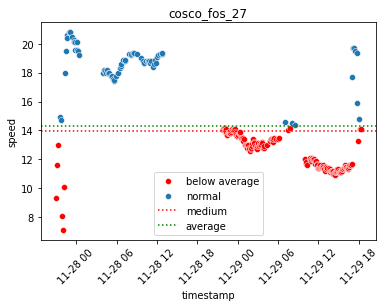

In [60]:
sns.scatterplot(
    data=cosco_fos_27[cosco_fos_27["speed"] < cosco_fos_27["speed"].mean()],
    x='timestamp',
    y='speed',
    color="red",
    label="below average")
sns.scatterplot(
    data=cosco_fos_27[cosco_fos_27["speed"] >= cosco_fos_27["speed"].mean()],
    x='timestamp',
    y='speed',
    label="normal")
plt.title("cosco_fos_27")
plt.xticks(rotation=45)
# plt.axvline(x=cosco_fos_23["timestamp"].values[0],
#             color="pink",
#             linestyle="dashed",
#             label="dfdf")
# plt.axvline(x=cosco_fos_23["timestamp"].values[-1],
#             color="pink",
#             linestyle="dashed")
# plt.axhline(y=cosco_fos_23["speed"].mean(), linestyle="dotted")
plt.axhline(
    y=(cosco_fos_27["speed"].max() + cosco_fos_27["speed"].min()) / 2,
    linestyle="dotted",
    label="medium",
    color="red",
)
plt.axhline(
    y=cosco_fos_27["speed"].mean(),
    linestyle="dotted",
    label="average",
    color="green",
)
# use the seaborn violinplot function to visualize the distribution of the speed values
# sns.violinplot(data=cosco_fos_23, x='index', y='speed', inner="stick")
plt.legend()
plt.show()

# ETA 차이 확인

출발지점, 중간 지점, 도착 지점의 ETA 비교   
- proposed_ETA, AIS_ETA, TOS_ETA 비교군,
- ATA는 ATB 고려해서 계산. 2번에서 대기 시간 확인한 것 체크

COSCO_FOS_26
최대: 0 days 01:56:13.045933
평균: 0 days 00:56:23.444487858


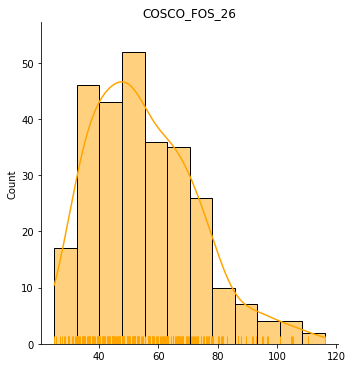

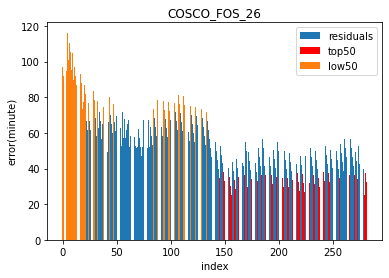

COSCO_FOS_25
최대: 0 days 01:55:59.885924
평균: 0 days 00:52:38.043386608


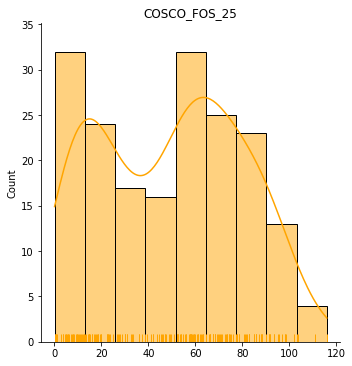

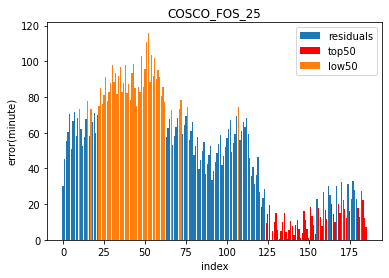

COSCO_FOS_23
최대: 0 days 00:34:46.370161
평균: 0 days 00:13:12.096527910


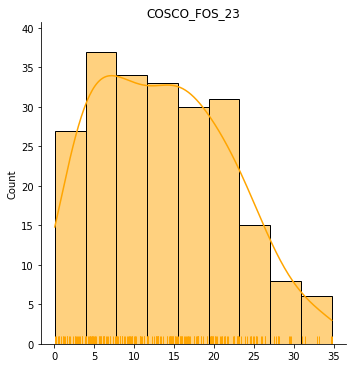

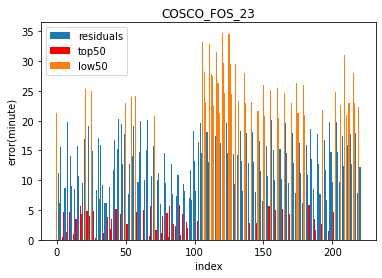

COSCO_FOS_27
최대: 0 days 05:56:51.656572
평균: 0 days 03:28:40.891892488


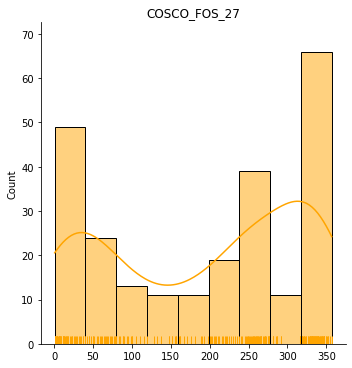

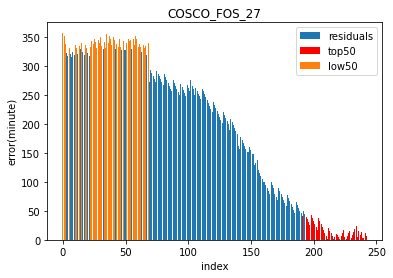

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

result_dfs = [cosco_fos_26, cosco_fos_25, cosco_fos_23, cosco_fos_27] # Replace with actual dataframes
voya_num = ["26", "25", "23", "27"]
for i, df in enumerate(result_dfs):
    
    print(f"COSCO_FOS_{voya_num[i]}")
    print("최대:", df.loc[df.index[:-20]]["error"].max())
    print("평균:", df.loc[df.index[:-20]]["error"].mean())
    sns.displot(df["error"].values.astype(float) / (1e9 * 60), kde=True, rug=True, color="orange")
    plt.title(f"COSCO_FOS_{voya_num[i]}")
    plt.show()

    error_sorted = df.sort_values('error').dropna()
    high_threshold = error_sorted.iloc[50]["error"]
    low_threshold = error_sorted.iloc[-50]["error"]
    
    high_errors = df[df['error'] < high_threshold]
    low_errors = df[df['error'] > low_threshold]
    plt.bar(df["index"].values, df["error"].values.astype(float) /(1e9 * 60), label="residuals")
    plt.bar(high_errors["index"].values, high_errors["error"].values.astype(float) /(1e9 * 60), label="top50", color="red")
    plt.bar(low_errors["index"].values, low_errors["error"].values.astype(float) /(1e9 * 60), label="low50")
    
    plt.xlabel("index")
    plt.ylabel("error(minute)")
    plt.legend()
    plt.title(f"COSCO_FOS_{voya_num[i]}")
    plt.show()
    print("="*100)


## 23항차

In [62]:
waiting_list = []
voyage_list = []

In [63]:
CFOS023_df_eta_index = CFOS023_df["ETA"].drop_duplicates().index
CFOS023_df.loc[CFOS023_df_eta_index]

,TML_NUM,TML_CD,TML_CUD,VSL_CD,CALL_YEAR,CALL_SEQ,VOYAGE,PTNR_CODE,BERTH_NO,ALONG_SIDE,FROM_BITT,TO_BITT,ETA,ETB,ETW,ETC,ETD,ATA,ATB,ATW,ATC,ATD,YARD_OPEN,YARD_CLOSE,DIS_QTY,LOAD_QTY,UPDATE_TIME,timestamp
0,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T2,P,23.0,39,2022-10-27 11:00:00,2022-10-27 12:00:00,NaN,NaN,2022-10-28 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-24 12:00:00,2022-10-27 02:00:00,1700,900,2022-10-22 09:06:10,2022-10-23 11:35:53.327940
328,2087,PNIT,U,CFOS,2022,23,CFOS023,COH,T3,P,43,59,2022-10-28 11:00:00,2022-10-28 12:00:00,NaN,NaN,2022-10-29 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-24 12:00:00,2022-10-28 02:00:00,1700,900,2022-10-24 15:19:10,2022-10-24 15:21:27.697696


In [64]:
cosco_fos_23["TOS_ETA"] = '2022-10-28 11:00:00'

In [65]:
pnit_history[pnit_history["모선항차"] == "CFOS023"]

,선석,선사,모선항차,선사항차,Head (Bridge) Stern,선명,ROUTE,반입마감시한,접안(예정)일시,출항(예정)일시,양하,적하,Shift,상태
209,T1(P),COH,CFOS023,2243E/2243W,10 (21) 26,COSCO FOS,AK3,2022-10-28 02:00:00,2022-10-28 12:00:00,2022-10-29 12:00:00,1364,319,0,DEPARTED


In [66]:
cosco_fos_23["PNIT_ETB"] = '2022-10-28 12:00:00'

In [67]:
cosco_fos_23["PNIT_ETB"] = pd.to_datetime(cosco_fos_23["PNIT_ETB"])
cosco_fos_23["TOS_ETA"] = pd.to_datetime(cosco_fos_23["TOS_ETA"])


In [68]:
cosco_fos_23["waiting_time"] = abs(cosco_fos_23["PNIT_ETB"] - cosco_fos_23["ATA"] )
cosco_fos_23["ais_eta_error"] = abs(cosco_fos_23["ais_eta"] - cosco_fos_23["ATA"] )
cosco_fos_23["TOS_ETA_error"] = abs(cosco_fos_23["TOS_ETA"] - cosco_fos_23["ATA"] )

In [69]:
start_time = cosco_fos_23.loc[cosco_fos_23.index[0], "timestamp"]
end_time =cosco_fos_23.loc[cosco_fos_23.index[-1], "timestamp"]
middle_time = start_time + (end_time - start_time) / 2
cosco_fos_23['diff'] = abs(cosco_fos_23['timestamp'] - middle_time)
closest_index = cosco_fos_23['diff'].idxmin()

# Get the closest timestamp
closest_timestamp = cosco_fos_23.loc[closest_index, 'timestamp']

In [70]:
cosco_fos_23.loc[closest_index]

index                                                  48
vessel_name                                     COSCO FOS
mmsi                                            477947700
imo                                             9484302.0
CAPACITY                                             4253
destination                                         KRBNP
eta                                              10280300
longitude                                        124.6432
latitude                                          35.9076
speed                                                18.3
heading                                             142.0
timestamp                      2022-10-27 15:42:17.083427
time_position_data_received           2022-10-27 06:40:19
time_voyage_data_received             2022-10-26 10:37:08
navigation_info                    under way using engine
remained_distance                              392.422449
estimated_fuel_consumption                     767.375279
ETA           

In [71]:
cosco_fos_23.drop(columns=["diff","eta",'mmsi','imo','CAPACITY'], inplace=True)

In [72]:
cosco_fos_23[cosco_fos_23["error"] > cosco_fos_23["ais_eta_error"]][["error","ais_eta_error"]]

,error,ais_eta_error


In [73]:
cosco_fos_23["ais_eta_error"].value_counts()

0 days 07:23:54.026414    160
0 days 08:23:54.026414     61
Name: ais_eta_error, dtype: int64

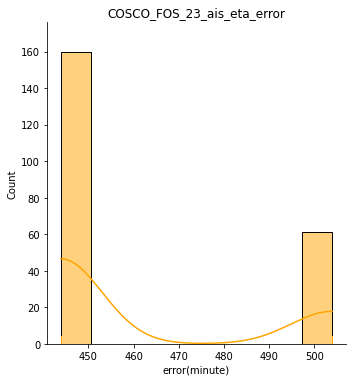

In [74]:
sns.displot(cosco_fos_23["ais_eta_error"].values.astype(float) / (1e9 * 60), kde=True, rug=True, color="orange")
plt.xlabel("error(minute)")
plt.title(f"COSCO_FOS_23_ais_eta_error")# sns.violinplot(data=cosco_fos_23, x='ais_eta_error_numeric')

plt.show()

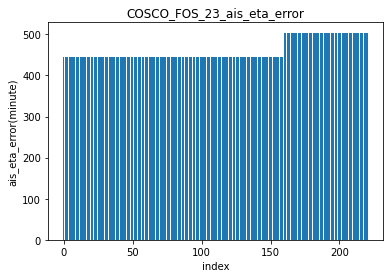

In [75]:
plt.bar(cosco_fos_23["index"].values, cosco_fos_23["ais_eta_error"].values.astype(float) /(1e9 * 60))
# sns.barplot(data=cosco_fos_23, x="index", y='ais_eta_error_numeric')

plt.xlabel("index")
plt.ylabel("ais_eta_error(minute)")
plt.yticks()
plt.title(f"COSCO_FOS_23_ais_eta_error")
plt.show()

In [76]:
cosco_fos_23["TOS_ETA_error"].value_counts()

0 days 00:36:05.973586    221
Name: TOS_ETA_error, dtype: int64

In [77]:
cosco_fos_23[cosco_fos_23["error"] > cosco_fos_23["ais_eta_error"]][["error","ais_eta_error"]]
cosco_fos_23[cosco_fos_23["error"] < cosco_fos_23["ais_eta_error"]][["error","ais_eta_error"]]

,error,ais_eta_error
0,0 days 00:21:15.981491,0 days 07:23:54.026414
1,0 days 00:11:10.276080,0 days 07:23:54.026414
2,0 days 00:06:08.045519,0 days 07:23:54.026414
3,0 days 00:15:33.016939,0 days 07:23:54.026414
4,0 days 00:00:24.551147,0 days 07:23:54.026414
...,...,...
216,0 days 00:23:02.361560,0 days 08:23:54.026414
217,0 days 00:17:59.489683,0 days 08:23:54.026414
218,0 days 00:07:53.664302,0 days 08:23:54.026414
219,0 days 00:22:22.812446,0 days 08:23:54.026414


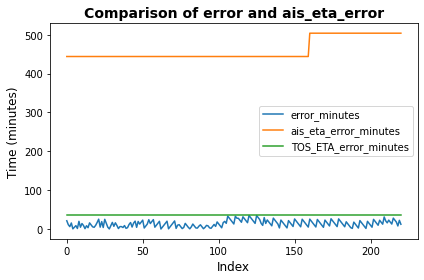

In [78]:
cosco_fos_23['error_minutes'] = cosco_fos_23['error'].dt.total_seconds() / 60
cosco_fos_23['ais_eta_error_minutes'] = cosco_fos_23['ais_eta_error'].dt.total_seconds() / 60
cosco_fos_23['TOS_ETA_error_minutes'] = cosco_fos_23['TOS_ETA_error'].dt.total_seconds() / 60

# set the index of the dataframe to the index column
cosco_fos_23.set_index(cosco_fos_23.index, inplace=True)

# plot the error and ais_eta_error columns in the same plot
cosco_fos_23[['error_minutes', 'ais_eta_error_minutes',"TOS_ETA_error_minutes"]].plot(kind='line')

# customize the plot to make it visually appealing
plt.xlabel('Index', fontsize=12)
plt.ylabel('Time (minutes)', fontsize=12)
plt.title('Comparison of error and ais_eta_error', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

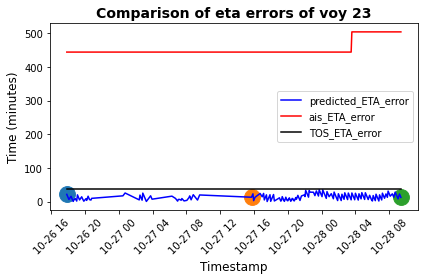

In [79]:
cosco_fos_23['error_minutes'] = cosco_fos_23['error'].dt.total_seconds() / 60
cosco_fos_23['ais_eta_error_minutes'] = cosco_fos_23['ais_eta_error'].dt.total_seconds() / 60
cosco_fos_23['TOS_ETA_error_minutes'] = cosco_fos_23['TOS_ETA_error'].dt.total_seconds() / 60

# plot the comparison using seaborn lineplot
sns.lineplot(data=cosco_fos_23, x="timestamp", y='error_minutes', color='blue', label="predicted_ETA_error")
sns.lineplot(data=cosco_fos_23, x="timestamp", y='ais_eta_error_minutes', color='red', label="ais_ETA_error")
sns.lineplot(data=cosco_fos_23, x="timestamp", y='TOS_ETA_error_minutes', color='black', label="TOS_ETA_error")

# plt.axvline(x=cosco_fos_23.timestamp[0],ymax=0.9,ymin=0.1,
#             linestyle="dotted",
#             label="medium",
#             color="red",
#             )

plt.scatter(x=cosco_fos_23.timestamp[0], y=cosco_fos_23.error_minutes[0], s=250)
# plt.scatter(x=cosco_fos_23.timestamp[0], y=cosco_fos_23.ais_eta_error_minutes[0])
# plt.scatter(x=cosco_fos_23.timestamp[0], y=cosco_fos_23.TOS_ETA_error_minutes[0])
plt.scatter(x=cosco_fos_23.timestamp[closest_index], y=cosco_fos_23.error_minutes[closest_index], s=250)
# plt.scatter(x=cosco_fos_23.timestamp[closest_index], y=cosco_fos_23.ais_eta_error_minutes[closest_index])
# plt.scatter(x=cosco_fos_23.timestamp[closest_index], y=cosco_fos_23.TOS_ETA_error_minutes[closest_index])
plt.scatter(x=cosco_fos_23.timestamp[cosco_fos_23.index[-1]], y=cosco_fos_23.error_minutes[cosco_fos_23.index[-1]], s=250)
# plt.scatter(x=cosco_fos_23.timestamp[cosco_fos_23.index[-1]], y=cosco_fos_23.ais_eta_error_minutes[cosco_fos_23.index[-1]])
# plt.scatter(x=cosco_fos_23.timestamp[cosco_fos_23.index[-1]], y=cosco_fos_23.TOS_ETA_error_minutes[cosco_fos_23.index[-1]])

# customize the plot to make it visually appealing
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Time (minutes)', fontsize=12)
plt.title('Comparison of eta errors of voy 23', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [80]:
cosco_fos_23.loc[[cosco_fos_23.index[0],closest_index,cosco_fos_23.index[-1]],['vessel_name','timestamp','ETA','ATA','error','ais_eta','TOS_ETA','PNIT_ETB','ais_eta_error','TOS_ETA_error']]

,vessel_name,timestamp,ETA,ATA,error,ais_eta,TOS_ETA,PNIT_ETB,ais_eta_error,TOS_ETA_error
0,COSCO FOS,2022-10-26 17:49:59.362708,2022-10-28 10:02:38.044923,2022-10-28 10:23:54.026414,0 days 00:21:15.981491,2022-10-28 03:00:00,2022-10-28 11:00:00,2022-10-28 12:00:00,0 days 07:23:54.026414,0 days 00:36:05.973586
48,COSCO FOS,2022-10-27 15:42:17.083427,2022-10-28 10:36:41.304835,2022-10-28 10:23:54.026414,0 days 00:12:47.278421,2022-10-28 03:00:00,2022-10-28 11:00:00,2022-10-28 12:00:00,0 days 07:23:54.026414,0 days 00:36:05.973586
220,COSCO FOS,2022-10-28 09:23:23.689423,2022-10-28 10:11:40.665822,2022-10-28 10:23:54.026414,0 days 00:12:13.360592,2022-10-28 02:00:00,2022-10-28 11:00:00,2022-10-28 12:00:00,0 days 08:23:54.026414,0 days 00:36:05.973586


In [81]:
voyage_list.append(23)

In [82]:
waiting_list.append(cosco_fos_23.loc[0,"waiting_time"])

## 25항차

In [83]:
CFOS025_df_eta_index = CFOS025_df["ETA"].drop_duplicates().index
CFOS025_df.loc[CFOS025_df_eta_index]

,TML_NUM,TML_CD,TML_CUD,VSL_CD,CALL_YEAR,CALL_SEQ,VOYAGE,PTNR_CODE,BERTH_NO,ALONG_SIDE,FROM_BITT,TO_BITT,ETA,ETB,ETW,ETC,ETD,ATA,ATB,ATW,ATC,ATD,YARD_OPEN,YARD_CLOSE,DIS_QTY,LOAD_QTY,UPDATE_TIME,timestamp
0,2237,PNIT,C,CFOS,2022,25,CFOS025,COH,T1,P,NaN,NaN,2022-11-07 11:00:00,2022-11-07 12:00:00,NaN,NaN,2022-11-09 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-10-07 12:00:00,2022-11-07 02:00:00,1700,900,NaN,2022-10-25 00:01:20.580206
1800,2237,PNIT,U,CFOS,2022,25,CFOS025,COH,OT,P,54.0,70,2022-11-11 11:00:00,2022-11-11 12:00:00,NaN,NaN,2022-11-12 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-08 12:00:00,2022-11-11 02:00:00,1700,900,2022-10-26 15:11:51,2022-10-31 14:11:25.604957
2880,2237,PNIT,U,CFOS,2022,25,CFOS025,COH,T1,P,2.0,18.0,2022-11-10 21:00:00,2022-11-10 22:00:00,NaN,NaN,2022-11-11 22:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-08 12:00:00,2022-11-10 12:00:00,1700,900,2022-11-04 11:31:25,2022-11-04 11:33:00.927175
3365,2237,PNIT,U,CFOS,2022,25,CFOS025,COH,T2,P,24.0,40.0,2022-11-13 21:00:00,2022-11-13 22:00:00,NaN,NaN,2022-11-14 22:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-07 22:00:00,2022-11-13 12:00:00,1700,900,2022-11-07 10:45:06,2022-11-07 10:46:57.274409
3413,2237,PNIT,U,CFOS,2022,25,CFOS025,COH,T2,P,24.0,40.0,2022-11-14 17:00:00,2022-11-14 18:00:00,NaN,NaN,2022-11-15 18:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-10 22:00:00,2022-11-14 08:00:00,1700,900,2022-11-07 14:44:53,2022-11-07 14:47:31.514751
3650,2237,PNIT,U,CFOS,2022,25,CFOS025,COH,T1,P,2.0,18.0,2022-11-14 10:00:00,2022-11-14 11:00:00,NaN,NaN,2022-11-15 11:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-10 22:00:00,2022-11-14 01:00:00,1700,900,2022-11-08 11:27:06,2022-11-08 11:31:53.775748
4259,2237,PNIT,U,CFOS,2022,25,CFOS025,COH,T3,P,45.0,61.0,2022-11-14 07:00:00,2022-11-14 08:00:00,NaN,NaN,2022-11-15 08:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-11 11:00:00,2022-11-13 22:00:00,1700,900,2022-11-10 14:55:29,2022-11-10 14:56:58.950121
4262,2237,PNIT,U,CFOS,2022,25,CFOS025,COH,T2,P,24.0,40.0,2022-11-14 13:00:00,2022-11-14 14:00:00,NaN,NaN,2022-11-15 14:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-11 11:00:00,2022-11-14 04:00:00,1700,900,2022-11-10 15:11:40,2022-11-10 15:12:07.608273
4265,2237,PNIT,U,CFOS,2022,25,CFOS025,COH,T2,P,24.0,40.0,2022-11-14 03:00:00,2022-11-14 04:00:00,NaN,NaN,2022-11-15 04:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-11 11:00:00,2022-11-13 18:00:00,1700,900,2022-11-10 15:23:29,2022-11-10 15:27:17.836465
4277,2237,PNIT,U,CFOS,2022,25,CFOS025,COH,T1,P,2.0,18.0,2022-11-13 23:00:00,2022-11-14 00:00:00,NaN,NaN,2022-11-15 04:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-11 11:00:00,2022-11-13 14:00:00,1700,900,2022-11-10 16:24:16,2022-11-10 16:27:52.542408


2022-11-13 10:49:06.249518, ETA 2022-11-14 15:00:00

ATB : 2022-11-14 16:20:00

In [84]:
first_idx = cosco_fos_25[cosco_fos_25["timestamp"] < pd.to_datetime('2022-11-13 10:49:06.249518')].index

In [85]:
first_ETA = '2022-11-14 02:00:00'

In [86]:
last_idx = cosco_fos_25[cosco_fos_25["timestamp"] >= pd.to_datetime('2022-11-13 10:49:06.249518')].index

In [87]:
second_ETA = '2022-11-14 15:00:00'

In [88]:
cosco_fos_25.loc[first_idx,"TOS_ETA"] = first_ETA
cosco_fos_25.loc[last_idx,"TOS_ETA"] = second_ETA


In [89]:
pnit_history[pnit_history["모선항차"] == "CFOS025"]

,선석,선사,모선항차,선사항차,Head (Bridge) Stern,선명,ROUTE,반입마감시한,접안(예정)일시,출항(예정)일시,양하,적하,Shift,상태
246,T1(P),COH,CFOS025,2245E/2245W,02 (13) 18,COSCO FOS,AK3,2022-11-14 15:00:00,2022-11-14 16:30:00,2022-11-15 14:00:00,1263,1067,0,DEPARTED


In [90]:
cosco_fos_25["PNIT_ETB"] = '2022-11-14 16:30:00'

In [91]:
cosco_fos_25["PNIT_ETB"] = pd.to_datetime(cosco_fos_25["PNIT_ETB"])
cosco_fos_25["TOS_ETA"] = pd.to_datetime(cosco_fos_25["TOS_ETA"])


In [92]:
cosco_fos_25["waiting_time"] = abs(cosco_fos_25["PNIT_ETB"] - cosco_fos_25["ATA"] )
cosco_fos_25["ais_eta_error"] = abs(cosco_fos_25["ais_eta"] - cosco_fos_25["ATA"] )
cosco_fos_25["TOS_ETA_error"] = abs(cosco_fos_25["TOS_ETA"] - cosco_fos_25["ATA"] )

In [93]:
start_time = cosco_fos_25.loc[cosco_fos_25.index[0], "timestamp"]
end_time =cosco_fos_25.loc[cosco_fos_25.index[-1], "timestamp"]
middle_time = start_time + (end_time - start_time) / 2
cosco_fos_25['diff'] = abs(cosco_fos_25['timestamp'] - middle_time)
closest_index = cosco_fos_25['diff'].idxmin()

# Get the closest timestamp
closest_timestamp = cosco_fos_25.loc[closest_index, 'timestamp']

In [94]:
cosco_fos_25.drop(columns=["diff","eta",'mmsi','imo','CAPACITY'], inplace=True)

In [95]:
cosco_fos_25

,index,vessel_name,destination,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error,ais_eta,TOS_ETA,PNIT_ETB,waiting_time,ais_eta_error,TOS_ETA_error
0,0,COSCO FOS,KRBNP,117.8129,38.9667,9.7,101.0,2022-11-12 22:47:30.142553,2022-11-12 13:47:12,2022-11-12 01:29:19,under way using engine,1073.125529,1340.873800,2022-11-14 15:00:08.824768,2022-11-14 14:29:52.786142,0 days 00:30:16.038626,2022-11-14 08:00:00,2022-11-14 02:00:00,2022-11-14 16:30:00,0 days 02:00:07.213858,0 days 06:29:52.786142,0 days 12:29:52.786142
1,1,COSCO FOS,KRBNP,117.8688,38.9578,12.4,100.0,2022-11-12 23:02:38.554501,2022-11-12 14:00:34,2022-11-12 01:55:09,under way using engine,1068.260054,1432.668366,2022-11-14 15:15:17.236716,2022-11-14 14:29:52.786142,0 days 00:45:24.450574,2022-11-14 06:00:00,2022-11-14 02:00:00,2022-11-14 16:30:00,0 days 02:00:07.213858,0 days 08:29:52.786142,0 days 12:29:52.786142
2,2,COSCO FOS,KRBNP,117.9026,38.9531,12.7,101.0,2022-11-12 23:12:44.814106,2022-11-12 14:08:21,2022-11-12 02:07:07,under way using engine,1065.345788,1448.963869,2022-11-14 15:25:23.496321,2022-11-14 14:29:52.786142,0 days 00:55:30.710179,2022-11-14 06:00:00,2022-11-14 02:00:00,2022-11-14 16:30:00,0 days 02:00:07.213858,0 days 08:29:52.786142,0 days 12:29:52.786142
3,3,COSCO FOS,KRBNP,117.9384,38.9479,14.5,99.0,2022-11-12 23:17:47.161732,2022-11-12 14:15:47,2022-11-12 02:07:07,under way using engine,1062.250502,1597.874275,2022-11-14 15:30:25.843947,2022-11-14 14:29:52.786142,0 days 01:00:33.057805,2022-11-14 06:00:00,2022-11-14 02:00:00,2022-11-14 16:30:00,0 days 02:00:07.213858,0 days 08:29:52.786142,0 days 12:29:52.786142
4,4,COSCO FOS,KRBNP,117.9789,38.9423,14.8,102.0,2022-11-12 23:27:54.327480,2022-11-12 14:23:39,2022-11-12 02:25:09,under way using engine,1058.760673,1623.040180,2022-11-14 15:40:33.009695,2022-11-14 14:29:52.786142,0 days 01:10:40.223553,2022-11-14 06:00:00,2022-11-14 02:00:00,2022-11-14 16:30:00,0 days 02:00:07.213858,0 days 08:29:52.786142,0 days 12:29:52.786142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,181,COSCO FOS,KRBNP,128.8237,34.6706,12.1,15.0,2022-11-14 13:04:04.589364,2022-11-14 04:00:10,2022-11-14 04:01:06,under way using engine,33.249592,44.013451,2022-11-14 14:16:56.230452,2022-11-14 14:29:52.786142,0 days 00:12:56.555690,2022-11-14 05:50:00,2022-11-14 15:00:00,2022-11-14 16:30:00,0 days 02:00:07.213858,0 days 08:39:52.786142,0 days 00:30:07.213858
182,182,COSCO FOS,KRBNP,128.8332,34.7060,11.6,18.0,2022-11-14 13:14:09.741189,2022-11-14 04:10:54,2022-11-14 04:01:06,under way using engine,29.337874,38.091925,2022-11-14 14:02:26.717588,2022-11-14 14:29:52.786142,0 days 00:27:26.068554,2022-11-14 05:50:00,2022-11-14 15:00:00,2022-11-14 16:30:00,0 days 02:00:07.213858,0 days 08:39:52.786142,0 days 00:30:07.213858
183,183,COSCO FOS,KRBNP,128.8385,34.7220,8.8,17.0,2022-11-14 13:19:12.903999,2022-11-14 04:16:35,2022-11-14 04:01:06,under way using engine,27.586732,34.706548,2022-11-14 14:07:29.880398,2022-11-14 14:29:52.786142,0 days 00:22:22.905744,2022-11-14 05:50:00,2022-11-14 15:00:00,2022-11-14 16:30:00,0 days 02:00:07.213858,0 days 08:39:52.786142,0 days 00:30:07.213858
184,184,COSCO FOS,KRBNP,128.8431,34.7435,10.1,355.0,2022-11-14 13:29:18.466495,2022-11-14 04:26:25,2022-11-14 04:19:06,under way using engine,25.233649,31.614220,2022-11-14 14:17:35.442894,2022-11-14 14:29:52.786142,0 days 00:12:17.343248,2022-11-14 05:50:00,2022-11-14 15:00:00,2022-11-14 16:30:00,0 days 02:00:07.213858,0 days 08:39:52.786142,0 days 00:30:07.213858


In [96]:
cosco_fos_25[cosco_fos_25["error"] > cosco_fos_25["ais_eta_error"]][["error","ais_eta_error"]]

,error,ais_eta_error


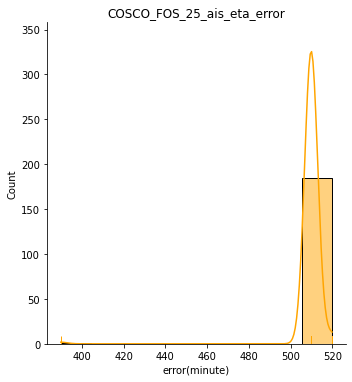

In [97]:
sns.displot(cosco_fos_25["ais_eta_error"].values.astype(float) / (1e9 * 60), kde=True, rug=True, color="orange")
plt.xlabel("error(minute)")
plt.title(f"COSCO_FOS_25_ais_eta_error")# sns.violinplot(data=cosco_fos_23, x='ais_eta_error_numeric')

plt.show()

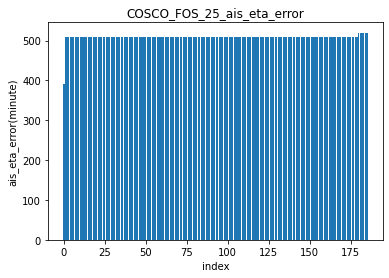

In [98]:
plt.bar(cosco_fos_25["index"].values, cosco_fos_25["ais_eta_error"].values.astype(float) /(1e9 * 60))
# sns.barplot(data=cosco_fos_23, x="index", y='ais_eta_error_numeric')

plt.xlabel("index")
plt.ylabel("ais_eta_error(minute)")
plt.yticks()
plt.title(f"COSCO_FOS_25_ais_eta_error")
plt.show()

In [99]:
cosco_fos_25["TOS_ETA_error"].value_counts()

0 days 00:30:07.213858    140
0 days 12:29:52.786142     46
Name: TOS_ETA_error, dtype: int64

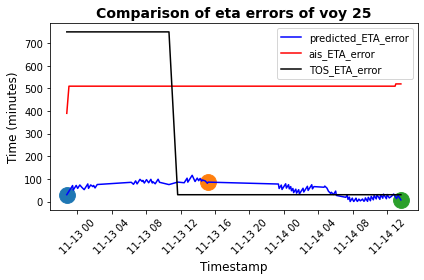

In [100]:
cosco_fos_23 = cosco_fos_25
cosco_fos_23['error_minutes'] = cosco_fos_23['error'].dt.total_seconds() / 60
cosco_fos_23['ais_eta_error_minutes'] = cosco_fos_23['ais_eta_error'].dt.total_seconds() / 60
cosco_fos_23['TOS_ETA_error_minutes'] = cosco_fos_23['TOS_ETA_error'].dt.total_seconds() / 60

# plot the comparison using seaborn lineplot
sns.lineplot(data=cosco_fos_23, x="timestamp", y='error_minutes', color='blue', label="predicted_ETA_error")
sns.lineplot(data=cosco_fos_23, x="timestamp", y='ais_eta_error_minutes', color='red', label="ais_ETA_error")
sns.lineplot(data=cosco_fos_23, x="timestamp", y='TOS_ETA_error_minutes', color='black', label="TOS_ETA_error")

# plt.axvline(x=cosco_fos_23.timestamp[0],ymax=0.9,ymin=0.1,
#             linestyle="dotted",
#             label="medium",
#             color="red",
#             )

plt.scatter(x=cosco_fos_23.timestamp[0], y=cosco_fos_23.error_minutes[0], s=250)
# plt.scatter(x=cosco_fos_23.timestamp[0], y=cosco_fos_23.ais_eta_error_minutes[0])
# plt.scatter(x=cosco_fos_23.timestamp[0], y=cosco_fos_23.TOS_ETA_error_minutes[0])
plt.scatter(x=cosco_fos_23.timestamp[closest_index], y=cosco_fos_23.error_minutes[closest_index], s=250)
# plt.scatter(x=cosco_fos_23.timestamp[closest_index], y=cosco_fos_23.ais_eta_error_minutes[closest_index])
# plt.scatter(x=cosco_fos_23.timestamp[closest_index], y=cosco_fos_23.TOS_ETA_error_minutes[closest_index])
plt.scatter(x=cosco_fos_23.timestamp[cosco_fos_23.index[-1]], y=cosco_fos_23.error_minutes[cosco_fos_23.index[-1]], s=250)
# plt.scatter(x=cosco_fos_23.timestamp[cosco_fos_23.index[-1]], y=cosco_fos_23.ais_eta_error_minutes[cosco_fos_23.index[-1]])
# plt.scatter(x=cosco_fos_23.timestamp[cosco_fos_23.index[-1]], y=cosco_fos_23.TOS_ETA_error_minutes[cosco_fos_23.index[-1]])

# customize the plot to make it visually appealing
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Time (minutes)', fontsize=12)
plt.title('Comparison of eta errors of voy 25', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [101]:
cosco_fos_23.loc[[cosco_fos_23.index[0],closest_index,cosco_fos_23.index[-1]],['vessel_name','timestamp','ETA','ATA','error','ais_eta','TOS_ETA','PNIT_ETB','ais_eta_error','TOS_ETA_error']]

,vessel_name,timestamp,ETA,ATA,error,ais_eta,TOS_ETA,PNIT_ETB,ais_eta_error,TOS_ETA_error
0,COSCO FOS,2022-11-12 22:47:30.142553,2022-11-14 15:00:08.824768,2022-11-14 14:29:52.786142,0 days 00:30:16.038626,2022-11-14 08:00:00,2022-11-14 02:00:00,2022-11-14 16:30:00,0 days 06:29:52.786142,0 days 12:29:52.786142
61,COSCO FOS,2022-11-13 15:11:44.039608,2022-11-14 15:55:38.505720,2022-11-14 14:29:52.786142,0 days 01:25:45.719578,2022-11-14 06:00:00,2022-11-14 15:00:00,2022-11-14 16:30:00,0 days 08:29:52.786142,0 days 00:30:07.213858
185,COSCO FOS,2022-11-14 13:34:21.366800,2022-11-14 14:22:38.343199,2022-11-14 14:29:52.786142,0 days 00:07:14.442943,2022-11-14 05:50:00,2022-11-14 15:00:00,2022-11-14 16:30:00,0 days 08:39:52.786142,0 days 00:30:07.213858


In [102]:
voyage_list.append(25)

In [103]:
waiting_list.append(cosco_fos_23.loc[0,"waiting_time"])

## 26항차

In [104]:
CFOS026_df_eta_index = CFOS026_df["ETA"].drop_duplicates().index
CFOS026_df.loc[CFOS026_df_eta_index]

,TML_NUM,TML_CD,TML_CUD,VSL_CD,CALL_YEAR,CALL_SEQ,VOYAGE,PTNR_CODE,BERTH_NO,ALONG_SIDE,FROM_BITT,TO_BITT,ETA,ETB,ETW,ETC,ETD,ATA,ATB,ATW,ATC,ATD,YARD_OPEN,YARD_CLOSE,DIS_QTY,LOAD_QTY,UPDATE_TIME,timestamp
0,2238,PNIT,U,CFOS,2022,26,CFOS026,COH,T1,P,NaN,NaN,2022-11-14 11:00:00,2022-11-14 12:00:00,NaN,NaN,2022-11-16 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-11 12:00:00,2022-11-14 02:00:00,1700,900,2022-10-31 10:43:07,2022-11-01 00:01:56.610666
1497,2238,PNIT,U,CFOS,2022,26,CFOS026,COH,OT,P,54.0,70.0,2022-11-18 11:00:00,2022-11-18 12:00:00,NaN,NaN,2022-11-19 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-11 12:00:00,2022-11-18 02:00:00,1700,900,2022-11-07 14:41:57,2022-11-07 14:47:31.514751
3460,2238,PNIT,U,CFOS,2022,26,CFOS026,COH,OT,P,54.0,70,2022-11-21 11:00:00,2022-11-21 12:00:00,NaN,NaN,2022-11-22 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-15 12:00:00,2022-11-21 02:00:00,1700,900,2022-11-14 12:58:23,2022-11-14 12:58:48.178041
3668,2238,PNIT,U,CFOS,2022,26,CFOS026,COH,T1,P,1.0,17,2022-11-22 16:00:00,2022-11-22 17:00:00,NaN,NaN,2022-11-23 17:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-18 12:00:00,2022-11-22 07:00:00,1700,900,2022-11-15 14:09:40,2022-11-15 14:10:19.317928
4187,2238,PNIT,U,CFOS,2022,26,CFOS026,COH,T2,P,24.0,40,2022-11-22 11:00:00,2022-11-22 12:00:00,NaN,NaN,2022-11-23 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-19 17:00:00,2022-11-22 02:00:00,1700,900,2022-11-17 09:59:15,2022-11-17 10:00:32.194995
4189,2238,PNIT,U,CFOS,2022,26,CFOS026,COH,T2,P,24.0,40,2022-11-22 09:00:00,2022-11-22 10:00:00,NaN,NaN,2022-11-23 10:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-19 17:00:00,2022-11-22 00:00:00,1700,900,2022-11-17 10:08:03,2022-11-17 10:10:37.606463
4557,2238,PNIT,U,CFOS,2022,26,CFOS026,COH,T1,P,2.0,18,2022-11-21 17:00:00,2022-11-21 18:00:00,NaN,NaN,2022-11-22 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-21 08:00:00,1700,900,2022-11-18 17:42:47,2022-11-18 17:43:22.289780


In [105]:
cosco_fos_26['TOS_ETA'] = '2022-11-21 17:00:00'

In [106]:
pnit_history[pnit_history["모선항차"] == "CFOS026"]

,선석,선사,모선항차,선사항차,Head (Bridge) Stern,선명,ROUTE,반입마감시한,접안(예정)일시,출항(예정)일시,양하,적하,Shift,상태
261,T1(P),COH,CFOS026,2246E/2246W,02 (13) 18,COSCO FOS,AK3,2022-11-21 23:00:00,2022-11-21 17:45:00,2022-11-23 03:00:00,1125,330,0,DEPARTED


In [107]:
cosco_fos_26["PNIT_ETB"] = '2022-11-21 17:45:00'

In [108]:
cosco_fos_26["PNIT_ETB"] = pd.to_datetime(cosco_fos_26["PNIT_ETB"])
cosco_fos_26["TOS_ETA"] = pd.to_datetime(cosco_fos_26["TOS_ETA"])


In [109]:
cosco_fos_26["waiting_time"] = abs(cosco_fos_26["PNIT_ETB"] - cosco_fos_26["ATA"] )
cosco_fos_26["ais_eta_error"] = abs(cosco_fos_26["ais_eta"] - cosco_fos_26["ATA"] )
cosco_fos_26["TOS_ETA_error"] = abs(cosco_fos_26["TOS_ETA"] - cosco_fos_26["ATA"] )

In [110]:
start_time = cosco_fos_26.loc[cosco_fos_26.index[0], "timestamp"]
end_time =cosco_fos_26.loc[cosco_fos_26.index[-1], "timestamp"]
middle_time = start_time + (end_time - start_time) / 2
cosco_fos_26['diff'] = abs(cosco_fos_26['timestamp'] - middle_time)
closest_index = cosco_fos_26['diff'].idxmin()

# Get the closest timestamp
closest_timestamp = cosco_fos_26.loc[closest_index, 'timestamp']

In [111]:
cosco_fos_26.drop(columns=["diff","eta",'mmsi','imo','CAPACITY'], inplace=True)

In [112]:
cosco_fos_26

,index,vessel_name,destination,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error,ais_eta,TOS_ETA,PNIT_ETB,waiting_time,ais_eta_error,TOS_ETA_error
0,0,COSCO FOS,KRBNP,118.0773,38.9155,14.7,115.0,2022-11-19 23:25:17.670300,2022-11-19 14:21:02,2022-11-19 02:19:09,under way using engine,1049.748068,1599.023661,2022-11-21 15:13:22.944030,2022-11-21 16:50:10.106911,0 days 01:36:47.162881,2022-11-21 08:00:00,2022-11-21 17:00:00,2022-11-21 17:45:00,0 days 00:54:49.893089,0 days 08:50:10.106911,0 days 00:09:49.893089
1,1,COSCO FOS,KRBNP,118.1096,38.9041,16.0,115.0,2022-11-19 23:30:20.270660,2022-11-19 14:27:33,2022-11-19 02:19:09,under way using engine,1046.683512,1737.726713,2022-11-21 15:18:25.544390,2022-11-21 16:50:10.106911,0 days 01:31:44.562521,2022-11-21 08:00:00,2022-11-21 17:00:00,2022-11-21 17:45:00,0 days 00:54:49.893089,0 days 08:50:10.106911,0 days 00:09:49.893089
2,2,COSCO FOS,KRBNP,118.1518,38.8866,15.5,120.0,2022-11-19 23:40:25.952188,2022-11-19 14:36:02,2022-11-19 02:37:12,under way using engine,1042.573266,1673.171691,2022-11-21 15:05:04.220137,2022-11-21 16:50:10.106911,0 days 01:45:05.886774,2022-11-21 08:00:00,2022-11-21 17:00:00,2022-11-21 17:45:00,0 days 00:54:49.893089,0 days 08:50:10.106911,0 days 00:09:49.893089
3,3,COSCO FOS,KRBNP,118.2060,38.8583,15.5,126.0,2022-11-19 23:50:31.604903,2022-11-19 14:48:01,2022-11-19 02:37:12,under way using engine,1037.056975,1664.318883,2022-11-21 15:15:09.872852,2022-11-21 16:50:10.106911,0 days 01:35:00.234059,2022-11-21 08:00:00,2022-11-21 17:00:00,2022-11-21 17:45:00,0 days 00:54:49.893089,0 days 08:50:10.106911,0 days 00:09:49.893089
4,4,COSCO FOS,KRBNP,118.2230,38.8488,15.3,113.0,2022-11-19 23:55:34.554597,2022-11-19 14:51:38,2022-11-19 02:55:09,under way using engine,1035.301317,1639.532376,2022-11-21 14:53:57.060978,2022-11-21 16:50:10.106911,0 days 01:56:13.045933,2022-11-21 08:00:00,2022-11-21 17:00:00,2022-11-21 17:45:00,0 days 00:54:49.893089,0 days 08:50:10.106911,0 days 00:09:49.893089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,277,COSCO FOS,KRBNP,128.7116,34.5657,14.3,55.0,2022-11-21 14:22:12.380621,2022-11-21 05:10:08,2022-11-21 05:01:06,under way using engine,45.979445,68.316123,2022-11-21 16:00:27.084675,2022-11-21 16:50:10.106911,0 days 00:49:43.022236,2022-11-21 08:00:00,2022-11-21 17:00:00,2022-11-21 17:45:00,0 days 00:54:49.893089,0 days 08:50:10.106911,0 days 00:09:49.893089
278,278,COSCO FOS,KRBNP,128.7337,34.5792,14.4,55.0,2022-11-21 14:32:19.571361,2022-11-21 05:15:55,2022-11-21 05:13:07,under way using engine,44.111420,65.944097,2022-11-21 16:10:34.275415,2022-11-21 16:50:10.106911,0 days 00:39:35.831496,2022-11-21 08:00:00,2022-11-21 17:00:00,2022-11-21 17:45:00,0 days 00:54:49.893089,0 days 08:50:10.106911,0 days 00:09:49.893089
279,279,COSCO FOS,KRBNP,128.7680,34.6024,13.7,30.0,2022-11-21 14:46:30.615843,2022-11-21 05:25:08,2022-11-21 05:13:07,under way using engine,41.100285,58.938203,2022-11-21 16:24:45.319897,2022-11-21 16:50:10.106911,0 days 00:25:24.787014,2022-11-21 08:00:00,2022-11-21 17:00:00,2022-11-21 17:45:00,0 days 00:54:49.893089,0 days 08:50:10.106911,0 days 00:09:49.893089
280,280,COSCO FOS,KRBNP,128.8274,34.7122,10.4,17.0,2022-11-21 15:24:21.086334,2022-11-21 06:07:40,2022-11-21 06:01:07,under way using engine,28.630808,36.016820,2022-11-21 16:12:38.062733,2022-11-21 16:50:10.106911,0 days 00:37:32.044178,2022-11-21 08:00:00,2022-11-21 17:00:00,2022-11-21 17:45:00,0 days 00:54:49.893089,0 days 08:50:10.106911,0 days 00:09:49.893089


In [113]:
cosco_fos_26[cosco_fos_26["error"] > cosco_fos_26["ais_eta_error"]][["error","ais_eta_error"]]

,error,ais_eta_error


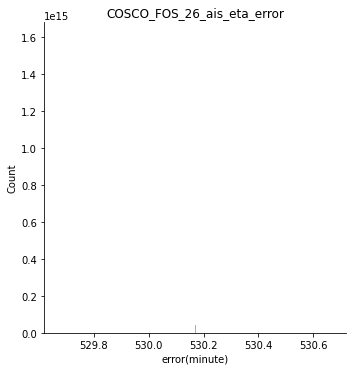

In [114]:
sns.displot(cosco_fos_26["ais_eta_error"].values.astype(float) / (1e9 * 60), kde=True, rug=True, color="orange")
plt.xlabel("error(minute)")
plt.title(f"COSCO_FOS_26_ais_eta_error")# sns.violinplot(data=cosco_fos_23, x='ais_eta_error_numeric')

plt.show()

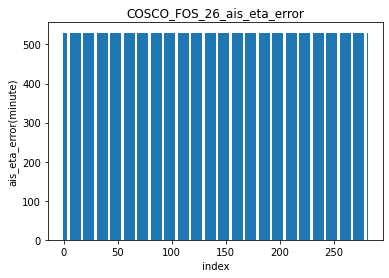

In [115]:
plt.bar(cosco_fos_26["index"].values, cosco_fos_26["ais_eta_error"].values.astype(float) /(1e9 * 60))
# sns.barplot(data=cosco_fos_23, x="index", y='ais_eta_error_numeric')

plt.xlabel("index")
plt.ylabel("ais_eta_error(minute)")
plt.yticks()
plt.title(f"COSCO_FOS_26_ais_eta_error")
plt.show()

In [116]:
cosco_fos_26["TOS_ETA_error"].value_counts()

0 days 00:09:49.893089    282
Name: TOS_ETA_error, dtype: int64

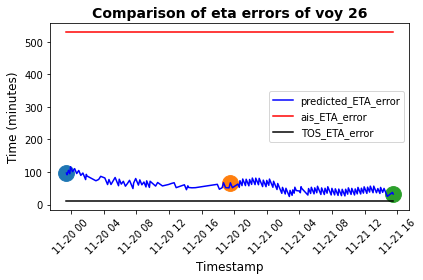

In [117]:
cosco_fos_23 = cosco_fos_26
cosco_fos_23['error_minutes'] = cosco_fos_23['error'].dt.total_seconds() / 60
cosco_fos_23['ais_eta_error_minutes'] = cosco_fos_23['ais_eta_error'].dt.total_seconds() / 60
cosco_fos_23['TOS_ETA_error_minutes'] = cosco_fos_23['TOS_ETA_error'].dt.total_seconds() / 60

# plot the comparison using seaborn lineplot
sns.lineplot(data=cosco_fos_23, x="timestamp", y='error_minutes', color='blue', label="predicted_ETA_error")
sns.lineplot(data=cosco_fos_23, x="timestamp", y='ais_eta_error_minutes', color='red', label="ais_ETA_error")
sns.lineplot(data=cosco_fos_23, x="timestamp", y='TOS_ETA_error_minutes', color='black', label="TOS_ETA_error")

# plt.axvline(x=cosco_fos_23.timestamp[0],ymax=0.9,ymin=0.1,
#             linestyle="dotted",
#             label="medium",
#             color="red",
#             )

plt.scatter(x=cosco_fos_23.timestamp[0], y=cosco_fos_23.error_minutes[0], s=250)
# plt.scatter(x=cosco_fos_23.timestamp[0], y=cosco_fos_23.ais_eta_error_minutes[0])
# plt.scatter(x=cosco_fos_23.timestamp[0], y=cosco_fos_23.TOS_ETA_error_minutes[0])
plt.scatter(x=cosco_fos_23.timestamp[closest_index], y=cosco_fos_23.error_minutes[closest_index], s=250)
# plt.scatter(x=cosco_fos_23.timestamp[closest_index], y=cosco_fos_23.ais_eta_error_minutes[closest_index])
# plt.scatter(x=cosco_fos_23.timestamp[closest_index], y=cosco_fos_23.TOS_ETA_error_minutes[closest_index])
plt.scatter(x=cosco_fos_23.timestamp[cosco_fos_23.index[-1]], y=cosco_fos_23.error_minutes[cosco_fos_23.index[-1]], s=250)
# plt.scatter(x=cosco_fos_23.timestamp[cosco_fos_23.index[-1]], y=cosco_fos_23.ais_eta_error_minutes[cosco_fos_23.index[-1]])
# plt.scatter(x=cosco_fos_23.timestamp[cosco_fos_23.index[-1]], y=cosco_fos_23.TOS_ETA_error_minutes[cosco_fos_23.index[-1]])
# customize the plot to make it visually appealing
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Time (minutes)', fontsize=12)
plt.title('Comparison of eta errors of voy 26', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [118]:
cosco_fos_23.loc[[cosco_fos_23.index[0],closest_index,cosco_fos_23.index[-1]],['vessel_name','timestamp','ETA','ATA','error','ais_eta','TOS_ETA','PNIT_ETB','ais_eta_error','TOS_ETA_error']]

,vessel_name,timestamp,ETA,ATA,error,ais_eta,TOS_ETA,PNIT_ETB,ais_eta_error,TOS_ETA_error
0,COSCO FOS,2022-11-19 23:25:17.670300,2022-11-21 15:13:22.944030,2022-11-21 16:50:10.106911,0 days 01:36:47.162881,2022-11-21 08:00:00,2022-11-21 17:00:00,2022-11-21 17:45:00,0 days 08:50:10.106911,0 days 00:09:49.893089
79,COSCO FOS,2022-11-20 19:31:36.055138,2022-11-21 15:43:01.236399,2022-11-21 16:50:10.106911,0 days 01:07:08.870512,2022-11-21 08:00:00,2022-11-21 17:00:00,2022-11-21 17:45:00,0 days 08:50:10.106911,0 days 00:09:49.893089
281,COSCO FOS,2022-11-21 15:29:24.442070,2022-11-21 16:17:41.418469,2022-11-21 16:50:10.106911,0 days 00:32:28.688442,2022-11-21 08:00:00,2022-11-21 17:00:00,2022-11-21 17:45:00,0 days 08:50:10.106911,0 days 00:09:49.893089


In [119]:
voyage_list.append(26)

In [120]:
waiting_list.append(cosco_fos_23.loc[0,"waiting_time"])

## 27항차

In [121]:
CFOS027_df_eta_index = CFOS027_df["ETA"].drop_duplicates().index
CFOS027_df.loc[CFOS027_df_eta_index]

,TML_NUM,TML_CD,TML_CUD,VSL_CD,CALL_YEAR,CALL_SEQ,VOYAGE,PTNR_CODE,BERTH_NO,ALONG_SIDE,FROM_BITT,TO_BITT,ETA,ETB,ETW,ETC,ETD,ATA,ATB,ATW,ATC,ATD,YARD_OPEN,YARD_CLOSE,DIS_QTY,LOAD_QTY,UPDATE_TIME,timestamp
0,2239,PNIT,U,CFOS,2022,27,CFOS027,COH,T1,P,NaN,NaN,2022-11-21 11:00:00,2022-11-21 12:00:00,NaN,NaN,2022-11-23 03:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-18 12:00:00,2022-11-21 02:00:00,1700,900,2022-10-31 10:43:08,2022-11-02 14:47:18.553373
3019,2239,PNIT,U,CFOS,2022,27,CFOS027,COH,OT,P,54.0,70,2022-11-27 11:00:00,2022-11-27 12:00:00,NaN,NaN,2022-11-28 12:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-18 12:00:00,2022-11-27 02:00:00,1700,900,2022-11-14 12:57:07,2022-11-14 12:58:48.178041
3817,2239,PNIT,U,CFOS,2022,27,CFOS027,COH,T2,P,24.0,40,2022-11-29 23:00:00,2022-11-30 00:00:00,NaN,NaN,2022-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-29 14:00:00,1700,900,2022-11-17 16:02:34,2022-11-17 16:03:56.224836
5191,2239,PNIT,U,CFOS,2022,27,CFOS027,COH,T2,P,30.0,46,2022-11-30 01:00:00,2022-11-30 02:00:00,NaN,NaN,2022-12-01 02:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-27 00:00:00,2022-11-29 16:00:00,1700,900,2022-11-22 14:15:46,2022-11-22 14:17:02.534977
5435,2239,PNIT,U,CFOS,2022,27,CFOS027,COH,T3,P,44.0,60,2022-11-29 14:00:00,2022-11-29 15:00:00,NaN,NaN,2022-11-30 15:00:00,NaN,NaN,NaN,NaN,NaN,2022-11-27 02:00:00,2022-11-29 05:00:00,1700,900,2022-11-23 11:23:20,2022-11-23 11:23:53.634333


In [122]:
cosco_fos_27['TOS_ETA'] = '2022-11-29 14:00:00'

In [123]:
pnit_history[pnit_history["모선항차"] == "CFOS027"]

,선석,선사,모선항차,선사항차,Head (Bridge) Stern,선명,ROUTE,반입마감시한,접안(예정)일시,출항(예정)일시,양하,적하,Shift,상태
280,T3(P),COH,CFOS027,2248E/2248W,47 (58) 63,COSCO FOS,AK3,2022-11-29 11:00:00,2022-11-29 21:10:00,2022-11-30 10:00:00,782,315,0,DEPARTED


In [124]:
cosco_fos_27["PNIT_ETB"] = '2022-11-29 21:10:00'

In [125]:
cosco_fos_27["PNIT_ETB"] = pd.to_datetime(cosco_fos_27["PNIT_ETB"])
cosco_fos_27["TOS_ETA"] = pd.to_datetime(cosco_fos_27["TOS_ETA"])


In [126]:
cosco_fos_27["waiting_time"] = abs(cosco_fos_27["PNIT_ETB"] - cosco_fos_27["ATA"] )
cosco_fos_27["ais_eta_error"] = abs(cosco_fos_27["ais_eta"] - cosco_fos_27["ATA"] )
cosco_fos_27["TOS_ETA_error"] = abs(cosco_fos_27["TOS_ETA"] - cosco_fos_27["ATA"] )

In [127]:
start_time = cosco_fos_27.loc[cosco_fos_27.index[0], "timestamp"]
end_time =cosco_fos_27.loc[cosco_fos_27.index[-1], "timestamp"]
middle_time = start_time + (end_time - start_time) / 2
cosco_fos_27['diff'] = abs(cosco_fos_27['timestamp'] - middle_time)
closest_index = cosco_fos_27['diff'].idxmin()

# Get the closest timestamp
closest_timestamp = cosco_fos_27.loc[closest_index, 'timestamp']

In [128]:
cosco_fos_27.drop(columns=["diff","eta",'mmsi','imo','CAPACITY'], inplace=True)

In [129]:
cosco_fos_27[["error","ais_eta_error"]]

,error,ais_eta_error
0,0 days 05:56:51.656572,0 days 15:11:21.050796
1,0 days 05:51:49.635103,0 days 15:11:21.050796
2,0 days 05:36:38.635517,0 days 15:11:21.050796
3,0 days 05:21:32.490984,0 days 15:11:21.050796
4,0 days 05:16:29.435892,0 days 15:11:21.050796
...,...,...
238,0 days 00:12:38.741168,0 days 08:11:21.050796
239,0 days 00:02:35.454273,0 days 08:11:21.050796
240,0 days 00:02:26.938069,0 days 08:11:21.050796
241,0 days 00:12:30.350270,0 days 08:11:21.050796


In [130]:
cosco_fos_27[cosco_fos_27["error"] > cosco_fos_27["ais_eta_error"]][["error","ais_eta_error"]]

,error,ais_eta_error


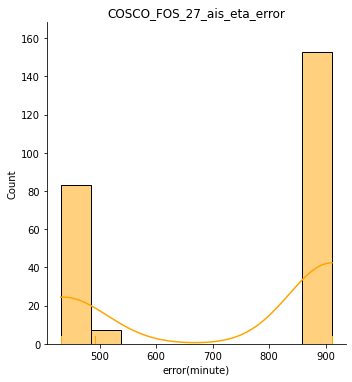

In [131]:
sns.displot(cosco_fos_27["ais_eta_error"].values.astype(float) / (1e9 * 60), kde=True, rug=True, color="orange")
plt.xlabel("error(minute)")
plt.title(f"COSCO_FOS_27_ais_eta_error")# sns.violinplot(data=cosco_fos_23, x='ais_eta_error_numeric')

plt.show()

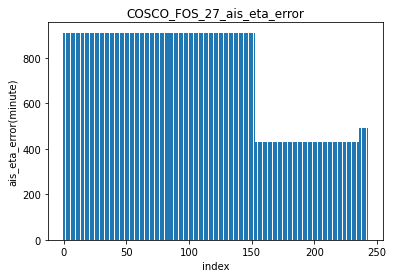

In [132]:
plt.bar(cosco_fos_27["index"].values, cosco_fos_27["ais_eta_error"].values.astype(float) /(1e9 * 60))
# sns.barplot(data=cosco_fos_23, x="index", y='ais_eta_error_numeric')

plt.xlabel("index")
plt.ylabel("ais_eta_error(minute)")
plt.yticks()
plt.title(f"COSCO_FOS_27_ais_eta_error")
plt.show()

In [133]:
cosco_fos_27["TOS_ETA_error"].value_counts()

0 days 05:11:21.050796    243
Name: TOS_ETA_error, dtype: int64

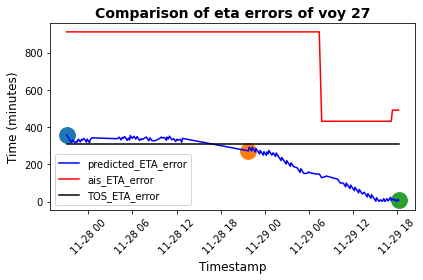

In [134]:
cosco_fos_23 = cosco_fos_27
cosco_fos_23['error_minutes'] = cosco_fos_23['error'].dt.total_seconds() / 60
cosco_fos_23['ais_eta_error_minutes'] = cosco_fos_23['ais_eta_error'].dt.total_seconds() / 60
cosco_fos_23['TOS_ETA_error_minutes'] = cosco_fos_23['TOS_ETA_error'].dt.total_seconds() / 60

# plot the comparison using seaborn lineplot
sns.lineplot(data=cosco_fos_23, x="timestamp", y='error_minutes', color='blue', label="predicted_ETA_error")
sns.lineplot(data=cosco_fos_23, x="timestamp", y='ais_eta_error_minutes', color='red', label="ais_ETA_error")
sns.lineplot(data=cosco_fos_23, x="timestamp", y='TOS_ETA_error_minutes', color='black', label="TOS_ETA_error")

# plt.axvline(x=cosco_fos_23.timestamp[0],ymax=0.9,ymin=0.1,
#             linestyle="dotted",
#             label="medium",
#             color="red",
#             )

plt.scatter(x=cosco_fos_23.timestamp[0], y=cosco_fos_23.error_minutes[0], s=250)
# plt.scatter(x=cosco_fos_23.timestamp[0], y=cosco_fos_23.ais_eta_error_minutes[0])
# plt.scatter(x=cosco_fos_23.timestamp[0], y=cosco_fos_23.TOS_ETA_error_minutes[0])
plt.scatter(x=cosco_fos_23.timestamp[closest_index], y=cosco_fos_23.error_minutes[closest_index], s=250)
# plt.scatter(x=cosco_fos_23.timestamp[closest_index], y=cosco_fos_23.ais_eta_error_minutes[closest_index])
# plt.scatter(x=cosco_fos_23.timestamp[closest_index], y=cosco_fos_23.TOS_ETA_error_minutes[closest_index])
plt.scatter(x=cosco_fos_23.timestamp[cosco_fos_23.index[-1]], y=cosco_fos_23.error_minutes[cosco_fos_23.index[-1]], s=250)
# plt.scatter(x=cosco_fos_23.timestamp[cosco_fos_23.index[-1]], y=cosco_fos_23.ais_eta_error_minutes[cosco_fos_23.index[-1]])
# plt.scatter(x=cosco_fos_23.timestamp[cosco_fos_23.index[-1]], y=cosco_fos_23.TOS_ETA_error_minutes[cosco_fos_23.index[-1]])
# customize the plot to make it visually appealing
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Time (minutes)', fontsize=12)
plt.title('Comparison of eta errors of voy 27', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [135]:
cosco_fos_23.loc[[cosco_fos_23.index[0],closest_index,cosco_fos_23.index[-1]],['vessel_name','timestamp','ETA','ATA','error','ais_eta','TOS_ETA','PNIT_ETB','ais_eta_error','TOS_ETA_error']]

,vessel_name,timestamp,ETA,ATA,error,ais_eta,TOS_ETA,PNIT_ETB,ais_eta_error,TOS_ETA_error
0,COSCO FOS,2022-11-27 21:01:50.712009,2022-11-29 13:14:29.394224,2022-11-29 19:11:21.050796,0 days 05:56:51.656572,2022-11-29 04:00:00,2022-11-29 14:00:00,2022-11-29 21:10:00,0 days 15:11:21.050796,0 days 05:11:21.050796
69,COSCO FOS,2022-11-28 21:48:33.592291,2022-11-29 14:39:06.006633,2022-11-29 19:11:21.050796,0 days 04:32:15.044163,2022-11-29 04:00:00,2022-11-29 14:00:00,2022-11-29 21:10:00,0 days 15:11:21.050796,0 days 05:11:21.050796
242,COSCO FOS,2022-11-29 18:16:01.111970,2022-11-29 19:04:18.088369,2022-11-29 19:11:21.050796,0 days 00:07:02.962427,2022-11-29 11:00:00,2022-11-29 14:00:00,2022-11-29 21:10:00,0 days 08:11:21.050796,0 days 05:11:21.050796


In [136]:
voyage_list.append(27)

In [137]:
waiting_list.append(cosco_fos_23.loc[0,"waiting_time"])

# waiting time

In [138]:
# voyage_list = [7, 8, "avg"]
# waiting_list = [
#     '0 days 06:23:50.308880','0 days 01:53:11.654525'
# ]
waiting_list = pd.to_timedelta(waiting_list)

In [139]:
voyage_list.append('avg')
waiting_list = waiting_list.values.astype(float) / (1e9 * 60)
waiting_list = np.append(waiting_list, np.mean(waiting_list))

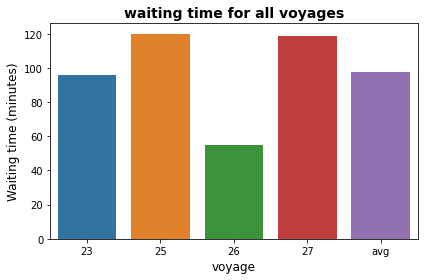

In [140]:
sns.barplot(x=voyage_list, y=waiting_list)
plt.xlabel('voyage', fontsize=12)
plt.ylabel('Waiting time (minutes)', fontsize=12)
plt.title('waiting time for all voyages', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()